## Исследование данных о российском кинопрокате



Изучим рынок российского кинопроката и выявим текущие тренды. Уделим внимание фильмам, которые получили государственную поддержку. Попробуем ответить на вопрос, насколько такие фильмы интересны зрителю. Воспользуемся данными из открытых источников Минкульта РФ.

### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

warnings.filterwarnings("ignore")

In [2]:
movies = pd.read_csv('D:\GitHub\movies\mkrf_movies.csv') #Откроем и сразу приведем к общему типу данных столбец puNumber
mkrf_shows = pd.read_csv('D:\GitHub\movies\mkrf_shows.csv')
print(mkrf_shows.info())
print(movies.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   obj

In [3]:
movies.drop(index=[*movies.query("puNumber=='нет'").index], inplace=True) #Уберем строку со значением "нет", чтобы привести к типу int
movies['puNumber'] = movies['puNumber'].astype('int64')

In [4]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int64  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [5]:
movies.head(10)
#mkrf_shows.head(10)

title   puNumber           show_start_date            type  \
0      Открытый простор  221048915  2015-11-27T12:00:00.000Z  Художественный   
1  Особо важное задание  111013716  2016-09-13T12:00:00.000Z  Художественный   
2          Особо опасен  221038416  2016-10-10T12:00:00.000Z  Художественный   
3          Особо опасен  221026916  2016-06-10T12:00:00.000Z  Художественный   
4          Особо опасен  221030815  2015-07-29T12:00:00.000Z  Художественный   
5     Остановился поезд  111013816  2016-09-13T12:00:00.000Z  Художественный   
6       Любовь и голуби  111007013  2013-10-18T12:00:00.000Z  Художественный   
7     Любовь и сигареты  221074614  2014-12-29T12:00:00.000Z  Художественный   
8    Отпетые мошенники.  121011416  2016-05-05T12:00:00.000Z  Художественный   
9   Отпуск за свой счет  111019114  2014-12-01T12:00:00.000Z  Художественный   

                                         film_studio production_country  \
0  Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...                США   
1                              Киностудия "Мосфильм"               СССР   
2  Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...                США   
3  Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...                США   
4  Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...                США   
5                              Киностудия "Мосфильм"               СССР   
6                              Киностудия "Мосфильм"               СССР   
7  Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...                США   
8                     Пульсар Продюксьон, ТФ1 Фильм             Франция   
9             Киностудия "Мосфильм", Телевидение ВНР      СССР, Венгрия   

            director                                           producer  \
0      Кевин Костнер          Дэвид Валдес, Кевин Костнер, Джейк Эбертс   
1          Е.Матвеев                                                NaN   
2  Тимур Бекмамбетов  Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит   
3  Тимур Бекмамбетов  Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит   
4  Тимур Бекмамбетов  Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит   
5       В.Абдрашитов                                                NaN   
6          В.Меньшов                                                NaN   
7      Джон Туртурро                        Джон Пенотти, Джон Туртурро   
8       Эрик Беснард                                        Патрис Леду   
9            В.Титов                                                NaN   

                   age_restriction  refundable_support  nonrefundable_support  \
0      «18+» - запрещено для детей                 NaN                    NaN   
1    «6+» - для детей старше 6 лет                 NaN                    NaN   
2      «18+» - запрещено для детей                 NaN                    NaN   
3      «18+» - запрещено для детей                 NaN                    NaN   
4      «18+» - запрещено для детей                 NaN                    NaN   
5    «6+» - для детей старше 6 лет                 NaN                    NaN   
6  «12+» - для детей старше 12 лет                 NaN                    NaN   
7      «18+» - запрещено для детей                 NaN                    NaN   
8      «18+» - запрещено для детей                 NaN                    NaN   
9  «12+» - для детей старше 12 лет                 NaN                    NaN   

   budget financing_source ratings                     genres  
0     NaN              NaN     7.2     боевик,драма,мелодрама  
1     NaN              NaN     6.6              драма,военный  
2     NaN              NaN     6.8  фантастика,боевик,триллер  
3     NaN              NaN     6.8  фантастика,боевик,триллер  
4     NaN              NaN     6.8  фантастика,боевик,триллер  
5     NaN              NaN     7.7                      драма  
6     NaN              NaN     8.3          мелодрама,комедия  
7     NaN              NaN     6.6   мюзикл,мелодрама,комедия  
8     NaN        

In [6]:
print(len(movies['puNumber'].unique())) #Проверим количество уникальных значений, все ли у нас совпадет
print(len(mkrf_shows['puNumber'].unique()))

7483
3158


Как видим, в датафрейме `movies` значений удостоверений кинопроката больше, чем во втором. Значит, в будущем датафрейме в столбце `box_office` будут пропуски.

In [7]:
df = movies.merge(mkrf_shows, on='puNumber', how='left') #Объединяем

In [8]:
!pip install pandas-profiling # Новый метод проверки датафрейма
import pandas_profiling
df.profile_report()

ERROR: Invalid requirement: '#'


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
mkrf_shows.query("puNumber==111007013") #Выберем конкретную колонку и проверим правильно ли склеилась таблица

puNumber  box_office
333  111007013      2700.0

In [10]:
df.query("box_office>0").head()

title   puNumber  \
6                            Любовь и голуби  111007013   
18                             Неподдающиеся  111003616   
19                                Неподсуден  111003716   
22  Операция "Ы" и другие приключения Шурика  111007413   
38                                 Мужики!..  111007213   

             show_start_date            type            film_studio  \
6   2013-10-18T12:00:00.000Z  Художественный  Киностудия "Мосфильм"   
18  2016-02-12T12:00:00.000Z  Художественный  Киностудия "Мосфильм"   
19  2016-02-12T12:00:00.000Z  Художественный  Киностудия "Мосфильм"   
22  2013-10-18T12:00:00.000Z  Художественный  Киностудия "Мосфильм"   
38  2013-10-18T12:00:00.000Z  Художественный  Киностудия "Мосфильм"   

   production_country                   director producer  \
6                СССР                  В.Меньшов      NaN   
18               СССР                  Ю.Чулюкин      NaN   
19               СССР  В.Краснопольский, В.Усков      NaN   
22               СССР                   Л.Гайдай      NaN   
38               СССР                    И.Бабич      NaN   

                    age_restriction  refundable_support  \
6   «12+» - для детей старше 12 лет                 NaN   
18    «6+» - для детей старше 6 лет                 NaN   
19    «6+» - для детей старше 6 лет                 NaN   
22    «6+» - для детей старше 6 лет                 NaN   
38    «6+» - для детей старше 6 лет                 NaN   

    nonrefundable_support  budget financing_source ratings  \
6                     NaN     NaN              NaN     8.3   
18                    NaN     NaN              NaN     8.0   
19                    NaN     NaN              NaN     7.7   
22                    NaN     NaN              NaN     8.7   
38                    NaN     NaN              NaN     8.1   

                        genres  box_office  
6            мелодрама,комедия      2700.0  
18           мелодрама,комедия       360.0  
19                       драма       420.0  
22  комедия,мелодрама,криминал       380.0  
38                       драма      1165.0

На примере строчки с индексом 6 мы видим, что датафрейм склеен правильно.

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int64  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

In [12]:
df.rename(columns={'puNumber':'pu_number'}, inplace=True) #Переименовали столбец
df.columns

Index(['title', 'pu_number', 'show_start_date', 'type', 'film_studio',
       'production_country', 'director', 'producer', 'age_restriction',
       'refundable_support', 'nonrefundable_support', 'budget',
       'financing_source', 'ratings', 'genres', 'box_office'],
      dtype='object')

Основная масса столбцов в нашем датафрейме носит тип `object`. Здесь почти нигде не нужно менять тип данных, разве что столбец `show_start_date` я бы перевел в формат `datetime`, а также столбец `age_restriction`, `financing_source` и `type` в формат `category` для экономии места. `ratings` приведем к `float`.

In [13]:
#print(df['age_restriction'].value_counts())
df.loc[df['age_restriction']=='«6+» - для детей старше 6 лет', 'age_restriction'] = '«06+» - для детей старше 6 лет'
#Добавим ноль, чтобы можно было отсортировать возраст по порядку
df['age_restriction'] = df['age_restriction'].astype('category')
print(df['age_restriction'].value_counts())

«16+» - для детей старше 16 лет           2851
«18+» - запрещено для детей               1605
«12+» - для детей старше 12 лет           1592
«0+» - для любой зрительской аудитории     811
«06+» - для детей старше 6 лет             626
Name: age_restriction, dtype: int64


In [14]:
#print(df['type'].value_counts())
df['type'] = df['type'].astype('category')

In [15]:
df['show_start_date'] = pd.to_datetime(df['show_start_date'])

In [16]:
#print(df['financing_source'].value_counts())
(df.loc[(df['financing_source']=='Министерство культуры') |
        (df['financing_source']=='Фонд кино'), 'financing_source']) = 'Министерство культуры, Фонд кино'
#Для нашего исследования не важно кто дал денег, Фонд кино или Минкульт. Объединим в одну категорию
df['financing_source'].fillna('None', inplace=True)  #Сразу заменю значения Nan на None для удобства категоризации
df['financing_source'] = df['financing_source'].astype('category')

In [17]:
#print(df['ratings'].value_counts(ascending=True)) #Мы потеряли небольшое количество данных в столбце ratings, не критично
df['ratings'] = pd.to_numeric(df['ratings'], errors='coerce')

In [18]:
df[['title', 'ratings']].head() #Проверим, равны ли рейтинги в датасете и на Кинопоиске

title  ratings
0      Открытый простор      7.2
1  Особо важное задание      6.6
2          Особо опасен      6.8
3          Особо опасен      6.8
4          Особо опасен      6.8

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7485 non-null   object             
 1   pu_number              7485 non-null   int64              
 2   show_start_date        7485 non-null   datetime64[ns, UTC]
 3   type                   7485 non-null   category           
 4   film_studio            7467 non-null   object             
 5   production_country     7483 non-null   object             
 6   director               7476 non-null   object             
 7   producer               6917 non-null   object             
 8   age_restriction        7485 non-null   category           
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

In [20]:
df.isna().mean()*100

title                     0.000000
pu_number                 0.000000
show_start_date           0.000000
type                      0.000000
film_studio               0.240481
production_country        0.026720
director                  0.120240
producer                  7.588510
age_restriction           0.000000
refundable_support       95.564462
nonrefundable_support    95.564462
budget                   95.564462
financing_source          0.000000
ratings                  13.293253
genres                   13.026052
box_office               57.808951
dtype: float64

Есть смысл заполнять значения только в столбцах `film_studio` - `producer`, а также `genres`. В них мы `NaN` заменим на `None`, создав дополнительную категорию. Столбцы про финансирование не заполнены на 95,5%, что означает, что госфинансирования не было, либо это иностранная картина. Остальные столбцы трогать не будем, чтобы не повредить исследованию, тк средние и медианные значения не годятся.

In [21]:
for column in df.loc[:, 'film_studio':'producer']:
    df[column].fillna('None', inplace=True)
df['genres'].fillna('None', inplace=True)
df.isna().mean()*100

title                     0.000000
pu_number                 0.000000
show_start_date           0.000000
type                      0.000000
film_studio               0.000000
production_country        0.000000
director                  0.000000
producer                  0.000000
age_restriction           0.000000
refundable_support       95.564462
nonrefundable_support    95.564462
budget                   95.564462
financing_source          0.000000
ratings                  13.293253
genres                    0.000000
box_office               57.808951
dtype: float64

#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

In [22]:
df.duplicated().sum() #Ноль!

0

In [23]:
for column in df.loc[:, 'title':'box_office']:
    print(f'''Дубликатов в столбце {column} равняется {df[column].duplicated().sum()}''')

Дубликатов в столбце title равняется 714
Дубликатов в столбце pu_number равняется 2
Дубликатов в столбце show_start_date равняется 5521
Дубликатов в столбце type равняется 7477
Дубликатов в столбце film_studio равняется 1994
Дубликатов в столбце production_country равняется 6534
Дубликатов в столбце director равняется 2673
Дубликатов в столбце producer равняется 2135
Дубликатов в столбце age_restriction равняется 7480
Дубликатов в столбце refundable_support равняется 7450
Дубликатов в столбце nonrefundable_support равняется 7409
Дубликатов в столбце budget равняется 7194
Дубликатов в столбце financing_source равняется 7483
Дубликатов в столбце ratings равняется 7404
Дубликатов в столбце genres равняется 6742
Дубликатов в столбце box_office равняется 4546


В остальных столбцах имеются дубликаты, но их не может не быть, тк у нас датафрейм практически полностью состоит из категориальных столбцов и столбцов типа `object`. В других столбцах это связано с большим количеством пропусков. В столбце `pu_number` есть два дубликата, на которые можно взглянуть поближе.

In [24]:
display(df[df.duplicated(subset=['pu_number'], keep=False)]) #Проверили, не дубликаты, просто ошибка

title  pu_number  \
4637                   Как жениться и остаться холостым  221154310   
4638  Иоанна - женщина на папском престоле /По роман...  221154310   
5066                                    Анализируй это!  221054410   
5067                                     Анализируй то!  221054410   

               show_start_date            type  \
4637 2010-12-17 12:00:00+00:00  Художественный   
4638 2010-12-17 12:00:00+00:00  Художественный   
5066 2010-05-25 12:00:00+00:00  Художественный   
5067 2010-05-25 12:00:00+00:00  Художественный   

                                            film_studio  \
4637  Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...   
4638   Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...   
5066          Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД   
5067  Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...   

                                production_country        director  \
4637                                       Франция    Эрик Лартиго   
4638  Германия - Великобритания - Италия - Испания  Зенке Вортманн   
5066                                 США-Австралия   ХЭрольд Рэмис   
5067                                           США  Гарольд Реймис   

                                        producer  \
4637                     Амандин Било, Алан Шаба   
4638  Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан   
5066             Джейн Розенталь, Пола Уейнстейн   
5067             Джейн Розенталь, Паул Уэйнстейн   

                      age_restriction  refundable_support  \
4637  «16+» - для детей старше 16 лет                 NaN   
4638  «16+» - для детей старше 16 лет                 NaN   
5066  «16+» - для детей старше 16 лет                 NaN   
5067  «12+» - для детей старше 12 лет                 NaN   

      nonrefundable_support  budget financing_source  ratings  \
4637                    NaN     NaN             None      7.0   
4638                    NaN     NaN             None      7.6   
5066                    NaN     NaN             None      7.4   
5067                    NaN     NaN             None      6.8   

                       genres  box_office  
4637        мелодрама,комедия         NaN  
4638  драма,мелодрама,история         NaN  
5066         комедия,криминал         NaN  
5067         комедия,криминал         NaN

При беглом рассмотрении, в данных очень много аномальных значений. В дальнейшем нужно с ними разобраться. Скорее всего, имела место техническая ошибка.

#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

In [25]:
for column in df.loc[:, ['type', 'age_restriction', 'financing_source']]:
    print(df[column].value_counts())

Художественный                4519
 Художественный               1389
Анимационный                   828
Прочие                         406
Документальный                 288
Научно-популярный               53
 Анимационный                    1
Музыкально-развлекательный       1
Name: type, dtype: int64
«16+» - для детей старше 16 лет           2851
«18+» - запрещено для детей               1605
«12+» - для детей старше 12 лет           1592
«0+» - для любой зрительской аудитории     811
«06+» - для детей старше 6 лет             626
Name: age_restriction, dtype: int64
None                                7153
Министерство культуры, Фонд кино     332
Name: financing_source, dtype: int64


В столбце с возрастными рейтингами все нормально. В столбце, где указаны источники финансирования, есть категория, которая дублирует две предыдущие. Мы не сможем ее заменить, поэтому оставим в таком виде. А вот в столбце `type` заметны неявные дубикаты из-за пробелов. Это исправим.

In [26]:
df['type'] = df['type'].str.strip()
df['type'] = df['type'].astype('category')
df['type'].value_counts()

Художественный                5908
Анимационный                   829
Прочие                         406
Документальный                 288
Научно-популярный               53
Музыкально-развлекательный       1
Name: type, dtype: int64

Ниже мы добавим новые столбцы, чтобы решить основную категориальную проблему датафрейма - категориальные строки даны списками из нескольких значений, и решить это возможно, оставив один из возможных вариантов.

#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

In [27]:
df.describe() #Осмотрим значения

pu_number  refundable_support  nonrefundable_support        budget  \
count  7.485000e+03        3.320000e+02           3.320000e+02  3.320000e+02   
mean   1.351966e+08        1.186446e+07           4.898099e+07  1.272297e+08   
std    3.835292e+07        2.491656e+07           5.998012e+07  1.885883e+08   
min    1.811096e+06        0.000000e+00           0.000000e+00  0.000000e+00   
25%    1.120251e+08        0.000000e+00           2.500000e+07  4.200000e+07   
50%    1.210155e+08        0.000000e+00           3.000000e+07  6.864992e+07   
75%    1.240033e+08        1.500000e+07           4.037500e+07  1.419853e+08   
max    2.310011e+08        1.800000e+08           4.000000e+08  2.305074e+09   

           ratings    box_office  
count  6490.000000  3.158000e+03  
mean      6.479245  7.647870e+07  
std       1.101665  2.403531e+08  
min       1.000000  0.000000e+00  
25%       5.900000  8.623900e+04  
50%       6.600000  2.327988e+06  
75%       7.200000  2.397967e+07  
max       9.200000  3.073569e+09

In [28]:
#df['box_office'].describe() #Удалим нулевые значения в столбце box_office
df.loc[df['box_office']==0, 'box_office'] = np.nan
#df.info()
df['box_office'].describe()

count    3.134000e+03
mean     7.706437e+07
std      2.411784e+08
min      4.000000e+01
25%      1.010288e+05
50%      2.409099e+06
75%      2.456979e+07
max      3.073569e+09
Name: box_office, dtype: float64

In [29]:
print(df.loc[df['box_office']<5000, 'box_office'].count()) #Очень много подозрительно низких значений, изучим
df.loc[df['box_office']<5000].head(10)

428


title  pu_number  \
6                            Любовь и голуби  111007013   
18                             Неподдающиеся  111003616   
19                                Неподсуден  111003716   
22  Операция "Ы" и другие приключения Шурика  111007413   
38                                 Мужики!..  111007213   
52                              Айболит - 66  111010513   
61                         Американская дочь  111005515   
68                               Алые паруса  111010913   
75                             Борис Годунов  111012213   
78                         Будьте моим мужем  111012413   

             show_start_date            type  \
6  2013-10-18 12:00:00+00:00  Художественный   
18 2016-02-12 12:00:00+00:00  Художественный   
19 2016-02-12 12:00:00+00:00  Художественный   
22 2013-10-18 12:00:00+00:00  Художественный   
38 2013-10-18 12:00:00+00:00  Художественный   
52 2013-12-19 12:00:00+00:00  Художественный   
61 2015-04-23 12:00:00+00:00  Художественный   
68 2013-12-19 12:00:00+00:00  Художественный   
75 2013-12-19 12:00:00+00:00  Художественный   
78 2013-12-19 12:00:00+00:00  Художественный   

                                          film_studio  \
6                               Киностудия "Мосфильм"   
18                              Киностудия "Мосфильм"   
19                              Киностудия "Мосфильм"   
22                              Киностудия "Мосфильм"   
38                              Киностудия "Мосфильм"   
52                              Киностудия "Мосфильм"   
61  АО "Караван", Компания "Америкен Дистрибьюшн",...   
68                              Киностудия "Мосфильм"   
75  Киностудия "Мосфильм",  "Баррандов" (ЧССР) при...   
78                              Киностудия "Мосфильм"   

                  production_country                   director producer  \
6                               СССР                  В.Меньшов     None   
18                              СССР                  Ю.Чулюкин     None   
19                              СССР  В.Краснопольский, В.Усков     None   
22                              СССР                   Л.Гайдай     None   
38                              СССР                    И.Бабич     None   
52                              СССР                Ролан Быков     None   
61            Россия, Казахстан, США               К.Шахназаров     None   
68                              СССР                   А.Птушко     None   
75  СССР, ЧССР, Западный Берлин, ПНР                С.Бондарчук     None   
78                              СССР                 А.Сурикова     None   

                           age_restriction  refundable_support  \
6          «12+» - для детей старше 12 лет                 NaN   
18          «06+» - для детей старше 6 лет                 NaN   
19          «06+» - для детей старше 6 лет                 NaN   
22          «06+» - для детей старше 6 лет                 NaN   
38          «06+» - для детей старше 6 лет                 NaN   
52  «0+» - для любой зрительской аудитории                 NaN   
61          «06+» - для детей старше 6 лет                 NaN   
68          «06+» - для детей старше 6 лет                 NaN   
75          «06+» - для детей старше 6 лет                 NaN   
78          «06+» - для детей старше 6 лет                 NaN   

    nonrefundable_support  budget financing_source  ratings  \
6                     NaN     NaN             None      8.3   
18                    NaN     NaN             None      8.0   
19                    NaN     NaN             None      7.7   
22                    NaN     NaN             None      8.7   
38                    NaN     NaN             None      8.1   
52                    NaN     NaN             None      7.1   
61                    NaN     NaN             None      7.0   
68                    NaN     NaN             None      7.8   
75                    NaN     NaN             None      6.2   
78                    NaN     NaN     

Очень много подозрительно низких данных по бокс-офису для достаточно популярных фильмов. Удалять их не буду, но в дальнейшем, возможно, придется делать срезы для исследований.

In [30]:
print(df['budget'].corr(df['nonrefundable_support']))
print(df['budget'].corr(df['refundable_support']))

0.5941693326605134
0.6412236551080055


In [31]:
display(df.query("~(budget.isna())").head()) #Посмотрим, как выглядят строки с заполненными значениями budget
nonref = df.loc[(df['budget']==0) & (df['nonrefundable_support']!=0), 'budget'].count() #Колчиество нулевых значений budget
ref = df.loc[(df['budget']==0) & (df['refundable_support']!=0), 'budget'].count() #в сравнении со смежными столбцами
print(f'''Количество строк, где нулевой бюджет при ненулевых показателях выплат: {ref if ref>nonref else nonref}''')
print(f'''Всего нулевых значений в budget: {df.loc[df['budget']==0, 'budget'].count()}''')

title  pu_number           show_start_date  \
1281        Пока еще жива  111005313 2013-10-11 12:00:00+00:00   
1448  Бесславные придурки  111003314 2014-03-28 12:00:00+00:00   
1498            Невидимки  111004213 2013-09-10 12:00:00+00:00   
1524                БЕРЦЫ  111004314 2014-05-05 12:00:00+00:00   
1792             Братья Ч  111004414 2014-04-23 12:00:00+00:00   

                type                                        film_studio  \
1281  Художественный  АНО содействия развитию кинематографии "Ангел-...   
1448  Художественный                         ООО "Компания "АТК-Студио"   
1498  Художественный                        ООО "Компания "РЕАЛ-ДАКОТА"   
1524  Художественный                             ООО "Студия "Пассажир"   
1792  Художественный                             ООО "Студия "Пассажир"   

     production_country                              director  \
1281             Россия                            А.Атанесян   
1448             Россия                             А.Якимчук   
1498             Россия              Р.Давлетьяров, С.Комаров   
1524             Россия  Е.Миндадзе (псевдоним Катя Шагалова)   
1792             Россия                              М.Угаров   

                                       producer  \
1281           А.Атанесян, М.Бабаханов, Р.Бутко   
1448                                 А.Тютрюмов   
1498  Р.Давлетьяров, А.Котелевский, А.Олейников   
1524                                 Л.Антонова   
1792                     А.Миндадзе, Л.Антонова   

                      age_restriction  refundable_support  \
1281  «16+» - для детей старше 16 лет                 0.0   
1448  «12+» - для детей старше 12 лет                 0.0   
1498  «12+» - для детей старше 12 лет                 0.0   
1524  «16+» - для детей старше 16 лет                 0.0   
1792  «16+» - для детей старше 16 лет                 0.0   

      nonrefundable_support       budget                  financing_source  \
1281             26500000.0   79411900.0  Министерство культуры, Фонд кино   
1448             26000000.0   37142857.0  Министерство культуры, Фонд кино   
1498            107847945.0  176023490.0  Министерство культуры, Фонд кино   
1524             28000000.0   40574140.0  Министерство культуры, Фонд кино   
1792             25000000.0   40015122.0  Министерство культуры, Фонд кино   

      ratings              genres  box_office  
1281      8.1     драма,мелодрама    365353.6  
1448      NaN                None     28140.0  
1498      5.3  комедия,фантастика  19957031.5  
1524      4.2               драма     55917.5  
1792      6.4               драма    232100.0

Количество строк, где нулевой бюджет при ненулевых показателях выплат: 16
Всего нулевых значений в budget: 17


Как видим, в датафрейме 16 строк, где нулевой бюджет, но при этом имеются ненулевые значения в столбцах `refundable_support` и `nonrefundable_support`. Это нужно исправить. Причем есть одна строка с нулевыми значениями везде. Итого 17.

In [32]:
df = df.query("budget!=0") #Убрали некорректные значения
#df.loc[(df['budget']==0) & (df['nonrefundable_support']!=0), 'budget'].count()
#df.info()

In [33]:
#есть ли такие строки где бюджет меньше, чем возвратные средства+невозвратные средства.
df['total_govt_support'] = df['refundable_support'] + df['nonrefundable_support'] #Создадим необходимый столбец
len(df.query("budget<total_govt_support"))

C:\Users\Генадий\AppData\Local\Temp\ipykernel_14060\1912088516.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_govt_support'] = df['refundable_support'] + df['nonrefundable_support'] #Создадим необходимый столбец


0

Нет, строк, где госсубсидий было бы больше, чем бюджета, нет. Скорее всего потому, что мы удалили значения с нулевыми показателями бюджета перед этим.

In [34]:
df.query("total_govt_support>0").isna().mean()*100 #Сильно ли повлияют пропуски в исследовании фильмов с госучастием

title                    0.000000
pu_number                0.000000
show_start_date          0.000000
type                     0.000000
film_studio              0.000000
production_country       0.000000
director                 0.000000
producer                 0.000000
age_restriction          0.000000
refundable_support       0.000000
nonrefundable_support    0.000000
budget                   0.000000
financing_source         0.000000
ratings                  5.396825
genres                   0.000000
box_office               4.444444
total_govt_support       0.000000
dtype: float64

Мы изучили `budget` и `box_office`. В столбцах `refundable_support` и `nonrefundable_support` есть нулевые значения, которые мы трогать не будем, потому что они не выбиваются из логики. Ведь возвратные и невозвратные средства могут иметь нулевые значения. У нас остаются два столбца - с номерами прокатных удостоверений и рейтингом. Ошибок с номерами немного, нулей и пропусков нет. Столбец безупречен. Что касается рейтингов, есть пропущенные значения, коих более 13%, а в фильмах с госучастием - более 5%. Есть вариант заменить пропущенные значения средним по жанру. Ведь известно, что у хорроров, к примеру, более низкие рейтинги, чем у драм. Но, подумав, я пришел к выводу, что пропусков слишком много, чтобы их замена могла исказить исследование, и в то же время слишком мало, чтобы их менять. К тому же, распределены они почти равномерно. Заменять не будем.

#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [35]:
df['year'] = df['show_start_date'].dt.year

C:\Users\Генадий\AppData\Local\Temp\ipykernel_14060\350145827.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['show_start_date'].dt.year


- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

In [36]:
def new_cols(new_col, old_col):
    df[new_col] = df[old_col].str.split(',', expand=True)[0]
new_cols('first_director', 'director')
new_cols('first_producer', 'producer')
new_cols('first_genres', 'genres')
df['first_genres'] = df['first_genres'].astype('category')
#df.head()

C:\Users\Генадий\AppData\Local\Temp\ipykernel_14060\2595068423.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[new_col] = df[old_col].str.split(',', expand=True)[0]
C:\Users\Генадий\AppData\Local\Temp\ipykernel_14060\2595068423.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['first_genres'] = df['first_genres'].astype('category')


- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [37]:
df['refundable_share'] = df['refundable_support']/df['budget']
df['nonrefundable_share'] = df['nonrefundable_support']/df['budget']
df['tot_govt_share'] = (df['refundable_support']+df['nonrefundable_support'])/df['budget']
df = df.round(2)
display(df.loc[df['budget']>0].head())
df.info()

C:\Users\Генадий\AppData\Local\Temp\ipykernel_14060\1648838012.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['refundable_share'] = df['refundable_support']/df['budget']
C:\Users\Генадий\AppData\Local\Temp\ipykernel_14060\1648838012.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['nonrefundable_share'] = df['nonrefundable_support']/df['budget']
C:\Users\Генадий\AppData\Local\Temp\ipykernel_14060\1648838012.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

title  pu_number           show_start_date  \
1281        Пока еще жива  111005313 2013-10-11 12:00:00+00:00   
1448  Бесславные придурки  111003314 2014-03-28 12:00:00+00:00   
1498            Невидимки  111004213 2013-09-10 12:00:00+00:00   
1524                БЕРЦЫ  111004314 2014-05-05 12:00:00+00:00   
1792             Братья Ч  111004414 2014-04-23 12:00:00+00:00   

                type                                        film_studio  \
1281  Художественный  АНО содействия развитию кинематографии "Ангел-...   
1448  Художественный                         ООО "Компания "АТК-Студио"   
1498  Художественный                        ООО "Компания "РЕАЛ-ДАКОТА"   
1524  Художественный                             ООО "Студия "Пассажир"   
1792  Художественный                             ООО "Студия "Пассажир"   

     production_country                              director  \
1281             Россия                            А.Атанесян   
1448             Россия                             А.Якимчук   
1498             Россия              Р.Давлетьяров, С.Комаров   
1524             Россия  Е.Миндадзе (псевдоним Катя Шагалова)   
1792             Россия                              М.Угаров   

                                       producer  \
1281           А.Атанесян, М.Бабаханов, Р.Бутко   
1448                                 А.Тютрюмов   
1498  Р.Давлетьяров, А.Котелевский, А.Олейников   
1524                                 Л.Антонова   
1792                     А.Миндадзе, Л.Антонова   

                      age_restriction  refundable_support  ...  \
1281  «16+» - для детей старше 16 лет                 0.0  ...   
1448  «12+» - для детей старше 12 лет                 0.0  ...   
1498  «12+» - для детей старше 12 лет                 0.0  ...   
1524  «16+» - для детей старше 16 лет                 0.0  ...   
1792  «16+» - для детей старше 16 лет                 0.0  ...   

                  genres  box_office total_govt_support  year  \
1281     драма,мелодрама    365353.6         26500000.0  2013   
1448                None     28140.0         26000000.0  2014   
1498  комедия,фантастика  19957031.5        107847945.0  2013   
1524               драма     55917.5         28000000.0  2014   
1792               драма    232100.0         25000000.0  2014   

                            first_director  first_producer  first_genres  \
1281                            А.Атанесян      А.Атанесян         драма   
1448                             А.Якимчук      А.Тютрюмов          None   
1498                         Р.Давлетьяров   Р.Давлетьяров       комедия   
1524  Е.Миндадзе (псевдоним Катя Шагалова)      Л.Антонова         драма   
1792                              М.Угаров      А.Миндадзе         драма   

      refundable_share nonrefundable_share tot_govt_share  
1281               0.0                0.33           0.33  
1448               0.0                0.70           0.70  
1498               0.0                0.61           0.61  
1524               0.0                0.69           0.69  
1792               0.0                0.62           0.62  

[5 rows x 24 columns]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7468 entries, 0 to 7484
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7468 non-null   object             
 1   pu_number              7468 non-null   int64              
 2   show_start_date        7468 non-null   datetime64[ns, UTC]
 3   type                   7468 non-null   category           
 4   film_studio            7468 non-null   object             
 5   production_country     7468 non-null   object             
 6   director               7468 non-null   object             
 7   producer               7468 non-null   object             
 8   age_restriction        7468 non-null   category           
 9   refundable_support     315 non-null    float64            
 10  nonrefundable_support  315 non-null    float64            
 11  budget                 315 non-null    float64          

### Шаг 3. Проведите исследовательский анализ данных


#### Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

In [38]:
sns.set(rc={'figure.figsize':(15, 8)}) #Задам размер таблиц

year
2010    985
2011    622
2012    593
2013    630
2014    805
2015    699
2016    815
2017    503
2018    887
2019    929
Name: title, dtype: int64


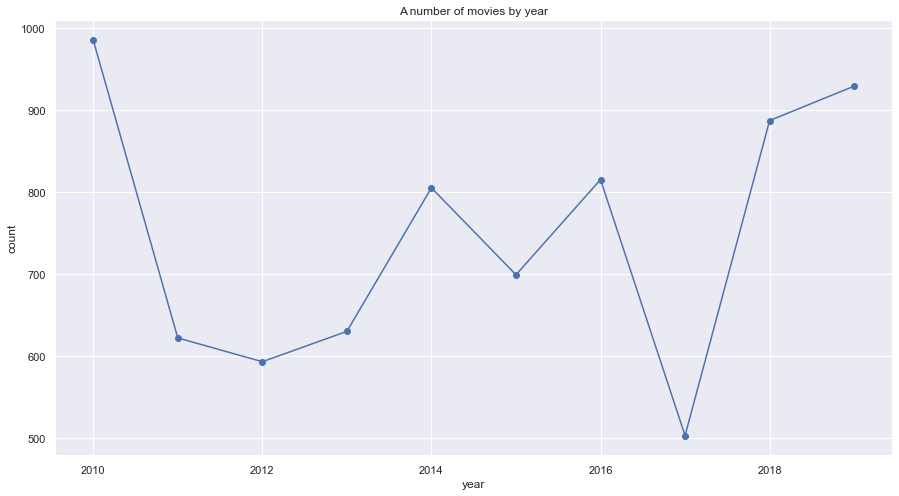

In [39]:
by_year = df.groupby('year')['title'].count()
print(by_year)
by_year.plot(style='o-', grid=True)
plt.ylabel('count')
plt.title('A number of movies by year')
plt.show()
by_year = by_year.to_frame().reset_index()

year
2010    101
2011    109
2012    123
2013    179
2014    272
2015    456
2016    522
2017    355
2018    471
2019    529
Name: box_office, dtype: int64


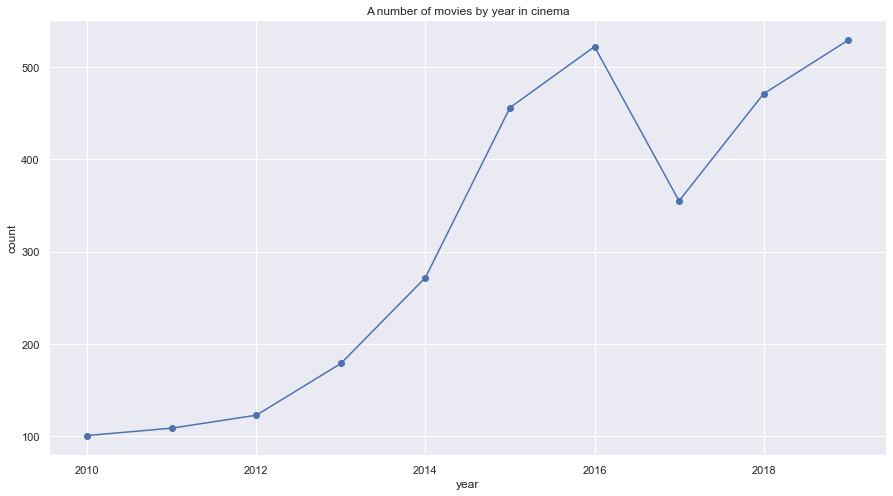

In [40]:
by_year_in_cinema = df.groupby('year')['box_office'].count() #Прокат в кино
print(by_year_in_cinema)
by_year_in_cinema.plot(style='o-', grid=True)
plt.ylabel('count')
plt.title('A number of movies by year in cinema')
plt.show()
by_year_in_cinema = by_year_in_cinema.to_frame().reset_index()

In [41]:
by_year_combined = by_year.merge(by_year_in_cinema, on='year') 
by_year_combined.columns = ['year', 'movies_by_year', 'movies_in_cinema']
by_year_combined['share'] = by_year_combined['movies_in_cinema']/by_year_combined['movies_by_year']
by_year_combined #Сделаем датафрейм, где сравним два получившихся Series

year  movies_by_year  movies_in_cinema     share
0  2010             985               101  0.102538
1  2011             622               109  0.175241
2  2012             593               123  0.207420
3  2013             630               179  0.284127
4  2014             805               272  0.337888
5  2015             699               456  0.652361
6  2016             815               522  0.640491
7  2017             503               355  0.705765
8  2018             887               471  0.531003
9  2019             929               529  0.569429

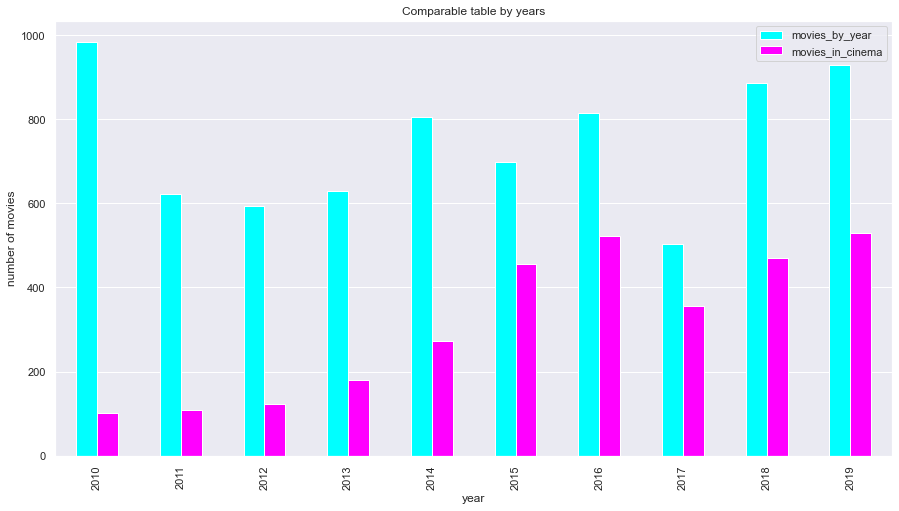

In [42]:
by_year_combined.plot.bar(x='year', y=['movies_by_year', 'movies_in_cinema'], cmap='cool')
plt.ylabel('number of movies') #Сделаем таблицу по получившемуся датафрейму для наглядности
plt.grid(axis='x')
plt.title('Comparable table by years')
plt.show()

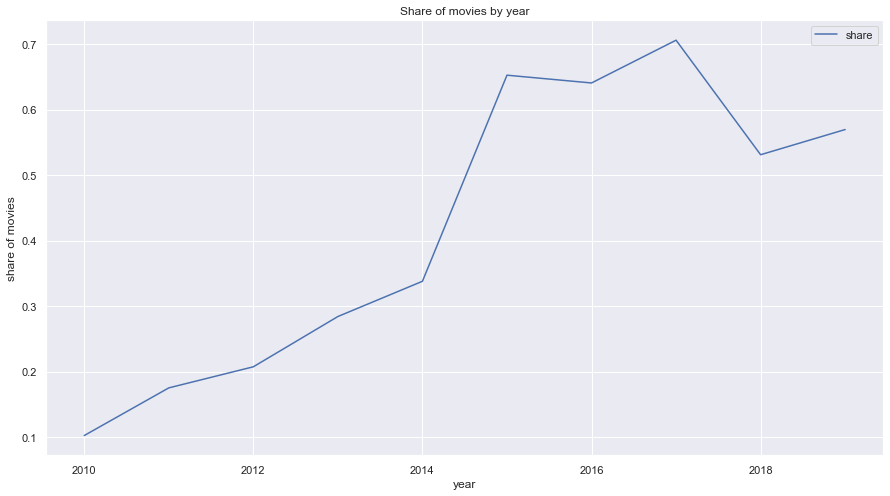

In [43]:
by_year_combined.plot(x='year', y='share') #Выведем наглядно долю вышедших фильмов в кинопрокате
plt.ylabel('share of movies')
plt.title('Share of movies by year')
plt.show()

In [44]:
by_year_combined.describe() #Напоследок выведем общую стат информацию по сформированному датафрейму

year  movies_by_year  movies_in_cinema      share
count    10.00000       10.000000         10.000000  10.000000
mean   2014.50000      746.800000        311.700000   0.420626
std       3.02765      160.632638        176.318556   0.223607
min    2010.00000      503.000000        101.000000   0.102538
25%    2012.25000      624.000000        137.000000   0.226597
50%    2014.50000      752.000000        313.500000   0.434446
75%    2016.75000      869.000000        467.250000   0.622725
max    2019.00000      985.000000        529.000000   0.705765

Выводы:
- Больше всего фильмов получало прокатное удостоверение в 2010 и 2019 гг. Меньше всего - в 2012 и 2017 гг. В среднем каждый год прокатные удостоверения получали 747 фильмов.
- Количество прокатываемого кино в кинотеатрах росло год от года, с небольшим снижением в 2017 г. В среднем за рассматриваемый период выходило в кино 312 фильмов.
- Доля фильмов, получивших прокатное удостоверение и вышедших в кинотеатры, также стабильно росла, достигнув пика почти в 71% в 2017 году, слегка снизившись после. Это свидетельствует о развитии отрасли в России, люди охотнее идут в кино, создатели охотно прокатывают свои фильмы в кинозалах. Возможно, дала свои плоды и борьба с пиратством.

#### Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

In [45]:
sum_of_box = df.groupby('year')['box_office'].agg(['count', 'sum', 'mean', 'median']).reset_index()
sum_of_box #Создадим таблицу из основных показателей группировки box office

year  count           sum          mean      median
0  2010    101  2.428654e+06  2.404608e+04     1710.00
1  2011    109  1.410276e+07  1.293832e+05     3000.00
2  2012    123  6.955423e+06  5.654815e+04     6220.00
3  2013    179  2.979971e+07  1.664788e+05     3580.00
4  2014    272  7.434718e+09  2.733352e+07    20310.00
5  2015    456  3.852783e+10  8.449085e+07  4864744.05
6  2016    522  4.674232e+10  8.954467e+07  3777202.68
7  2017    355  4.845815e+10  1.365018e+08  9919415.00
8  2018    471  4.925199e+10  1.045690e+08  8751895.75
9  2019    529  4.827810e+10  9.126295e+07  4601033.60

Text(0.5, 1.0, 'Sum of box offices by year')

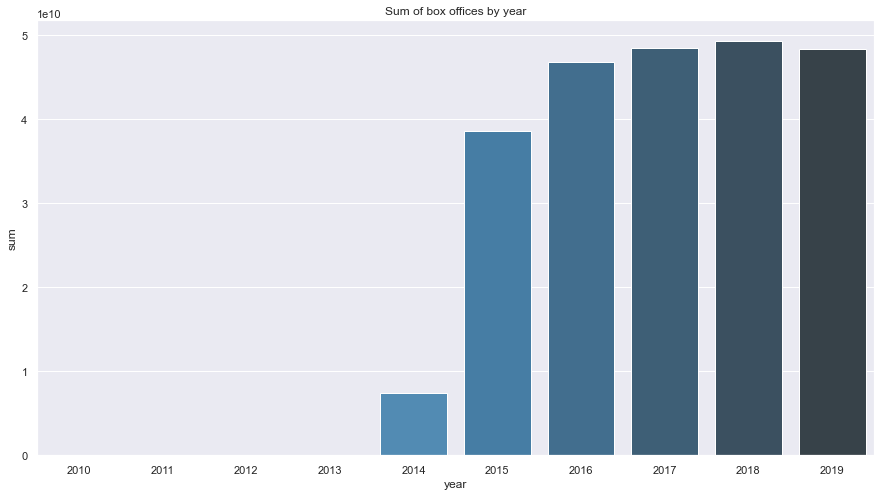

In [46]:
sns.barplot(x='year', y='sum',data=sum_of_box, palette="Blues_d").set_title('Sum of box offices by year')

Text(0.5, 1.0, 'Median of box offices by year')

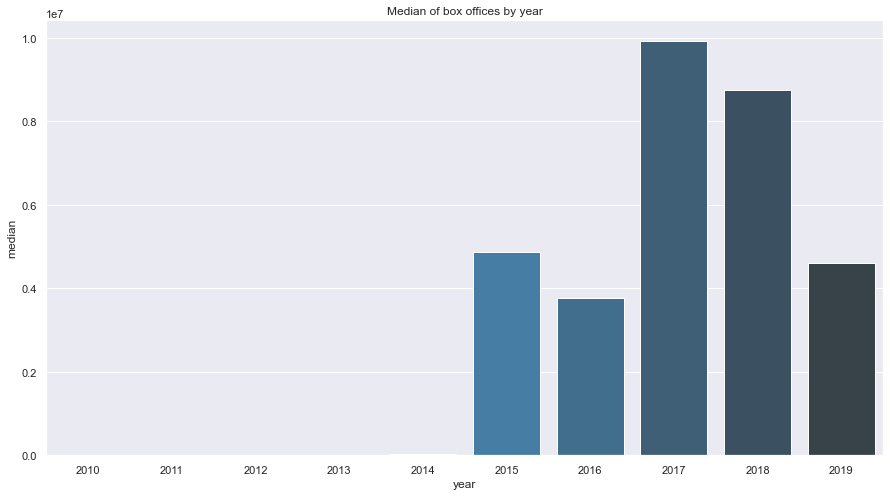

In [47]:
sns.barplot(x='year', y='median',data=sum_of_box, palette="Blues_d").set_title('Median of box offices by year')

Как видим из таблицы и графика, до 2014 года суммы бокс-офисов были просто смешными, если посмотреть на медианные значения, большинство боксов просто не выдерживают критики на правдоподобность. После 2014 года мы видим рост сборов, который достигает пика в 2018 году с небольшим снижением в 2019 г. Видно, что Минкульт либо навел порядок со сбором статистики, либо в целом вывел отрасль из серой зоны.

#### С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

mean      median
        box_office  box_office
year                          
2010  2.404608e+04     1710.00
2011  1.293832e+05     3000.00
2012  5.654815e+04     6220.00
2013  1.664788e+05     3580.00
2014  2.733352e+07    20310.00
2015  8.449085e+07  4864744.05
2016  8.954467e+07  3777202.68
2017  1.365018e+08  9919415.00
2018  1.045690e+08  8751895.75
2019  9.126295e+07  4601033.60

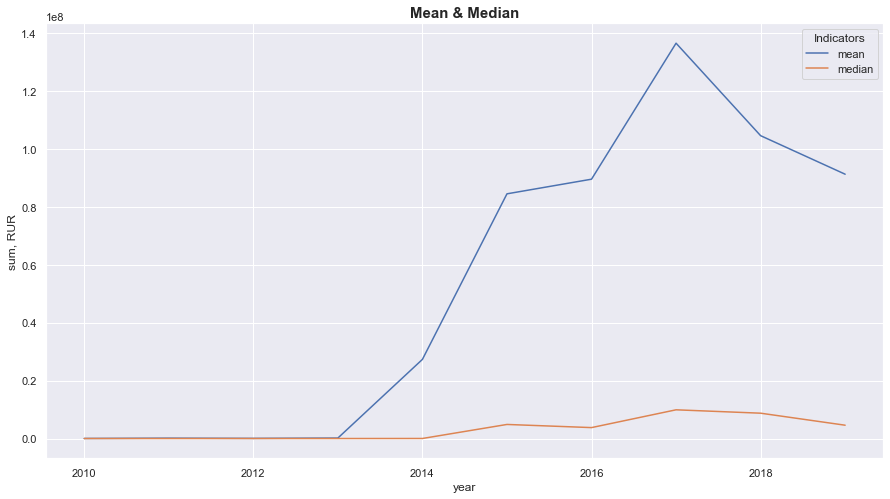

In [48]:
def count_mean_and_median(data): #Сделаю функцию, чтобы сравнивать среднее и медиану
    pivot_box_office = data.pivot_table(index='year', values='box_office', aggfunc=['mean', 'median'])
    display(pivot_box_office)
    pivot_box_office.plot()
    plt.title('Mean & Median', fontweight='bold', fontsize=15)
    plt.ylabel('sum, RUR')
    plt.legend(['mean', 'median']).set_title('Indicators')
    plt.show()
count_mean_and_median(df)

Медианные показатели значительно отстают от средних. Что не удивительно, тк количественную основу кинопроката составляют низкобюджетные ленты, но основную кассу собирают немногочисленные мейджоры.

In [49]:
print(f'''Общее число фильмов в кинопрокате за 2017 год: {len(df.query("(year==2017) & (box_office>0)"))}''')
print(f'''Общее число крупнобюджетных фильмов в кинопрокате за 2017 год: 
{len(df.query("(year==2017) & (box_office>200000000)"))}''')

Общее число фильмов в кинопрокате за 2017 год: 355
Общее число крупнобюджетных фильмов в кинопрокате за 2017 год: 
60


In [50]:
for year in sorted(df['year'].unique()): #Просто взглянем на лидеров проката в каждом году
    display(df.query("year==@year").pivot_table(index=['year', 'title'], 
    values='box_office', aggfunc='sum').sort_values(by='box_office', ascending=False).head())

box_office
year title                                                         
2010 Морские динозавры 3D: Путешествие в доисторичес...   1446400.0
     Хаббл 3D                                              245630.0
     Братья      .                                         168411.0
     Стоун                                                  54060.0
     Три богатыря и Шамаханская царица                      45225.0

box_office
year title                                                         
2011 Черные дыры: Обратная сторона Вселенной             11618085.0
     Естественный отбор /По книгам Чарльза Дарвина "...    860810.0
     Райд "Сатурн" из серии "Космический парк 360"         421940.0
     Смурфики                                              106060.0
     Кунг-фу Панда 2                                        94515.0

box_office
year title                                                 
2012 Мстители_                                    2311220.0
     Монстры на каникулах                          842234.0
     Ледниковый период 4: Континентальный дрейф    609274.0
     Белоснежка и охотник                          470427.0
     Три богатыря на дальних берегах               351643.0

box_office
year title                                  
2013 Невидимки                    19957031.5
     Великая красота               4321638.0
     Иван Царевич и Серый Волк 2   1081797.0
     Что творят мужчины             779027.6
     Пока еще жива                  365353.6

box_office
year title                                                           
2014 Седьмой сын                                         1.016411e+09
     Исход: Цари и боги                                  9.702768e+08
     Пятьдесят оттенков серого /По произведению Э.Л....  9.637288e+08
     Kingsman: Секретная служба                          5.669246e+08
     Ночь в музее: Секрет гробницы                       4.882237e+08

box_office
year title                                         
2015 Звёздные войны: Пробуждение силы  1.658861e+09
     Миньоны                           1.646581e+09
     Мстители: Эра Альтрона            1.500989e+09
     Форсаж 7                          1.486131e+09
     Мир Юрского периода               1.211159e+09

box_office
year title                                                           
2016 Зверополис                                          2.048127e+09
     Тайная жизнь домашних животных. Миньоны против ...  1.971005e+09
     Дэдпул                                              1.587516e+09
     Отряд самоубийц                                     1.570380e+09
     Экипаж .                                            1.402255e+09

box_office
year title                                                           
2017 Движение вверх                                      2.779686e+09
     Пираты Карибского моря: Мертвецы не рассказываю...  2.118396e+09
     Последний богатырь                                  1.655038e+09
     Стражи Галактики. Часть 2                           1.468780e+09
     Форсаж 8                                            1.429977e+09

box_office
year title                                                          
2018 Т-34                                               2.271754e+09
     Веном                                              1.913258e+09
     Мстители: Война бесконечности                      1.875990e+09
     Полицейский с рублевки. Новогодний беспредел       1.682680e+09
     Фантастические твари: Преступления Грин-де-Вальда  1.520627e+09

box_office
year title                                    
2019 Холоп                        3.073569e+09
     Мстители: Финал              2.576614e+09
     Малефисента: Владычица тьмы  1.911945e+09
     Джокер                       1.890368e+09
     Холодное сердце II           1.827245e+09

Удивительно, но зачастую лидерами проката становятся отечественные картины, обгоняя голливудские блокбастеры. После 2014 года и вправду сборы начали значительно расти.

#### Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

In [51]:
by_age_restriction = (df.query("2015<=year<=2019").groupby('age_restriction')['box_office']
                      .agg(['count', 'sum', 'mean', 'median']).sort_values(by='count').reset_index()
)
by_age_restriction #Создадим таблицу по категориям

age_restriction  count           sum          mean  \
0  «0+» - для любой зрительской аудитории     90  8.090774e+08  8.989749e+06   
1          «06+» - для детей старше 6 лет    311  5.522019e+10  1.775569e+08   
2         «12+» - для детей старше 12 лет    344  5.936919e+10  1.725849e+08   
3             «18+» - запрещено для детей    791  4.075766e+10  5.152675e+07   
4         «16+» - для детей старше 16 лет    797  7.510227e+10  9.423120e+07   

        median  
0   2949626.65  
1  13596322.70  
2   4928678.00  
3   6164575.34  
4   5477552.00

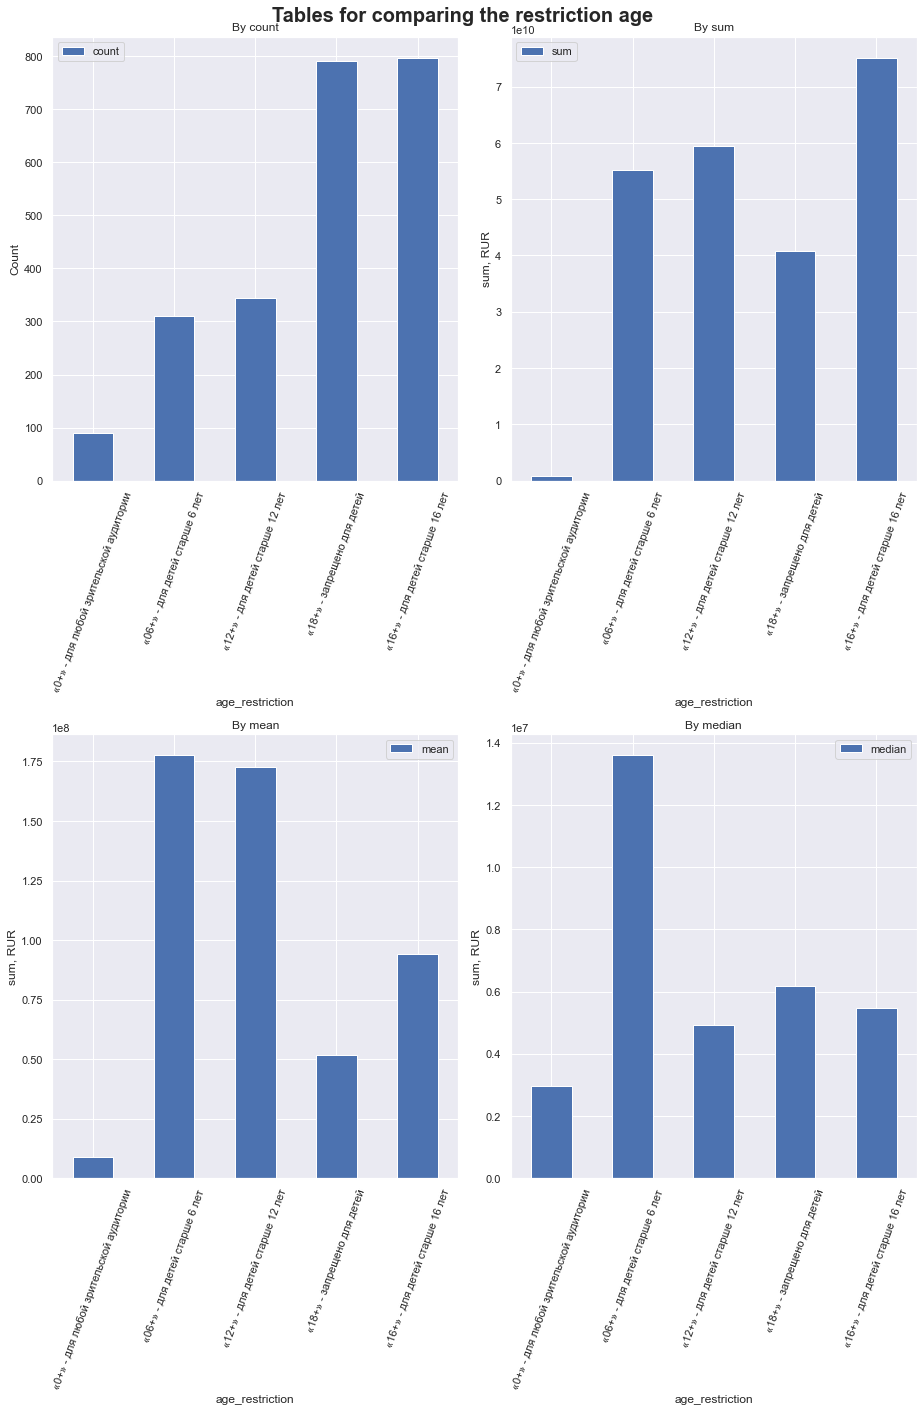

In [52]:
fig, ax = plt.subplots(2, 2, figsize=[13, 20])
fig.suptitle('Tables for comparing the restriction age', fontweight='bold', fontsize=20)

by_age_restriction.plot(ax=ax[0,0], kind='bar', x='age_restriction', y='count')
ax[0,0].set_title('By count')
ax[0,0].set_ylabel('Count')
ax[0,0].set_xticklabels(by_age_restriction['age_restriction'],rotation=70)

by_age_restriction.plot(ax=ax[0,1], kind='bar', x='age_restriction', y='sum')
ax[0,1].set_title('By sum')
ax[0,1].set_ylabel('sum, RUR')
ax[0,1].set_xticklabels(by_age_restriction['age_restriction'],rotation=70)

by_age_restriction.plot(ax=ax[1,0], kind='bar', x='age_restriction', y='mean')
ax[1,0].set_title('By mean')
ax[1,0].set_ylabel('sum, RUR')
ax[1,0].set_xticklabels(by_age_restriction['age_restriction'],rotation=70)

by_age_restriction.plot(ax=ax[1,1], kind='bar', x='age_restriction', y='median')
ax[1,1].set_title('By median')
ax[1,1].set_ylabel('sum, RUR')
ax[1,1].set_xticklabels(by_age_restriction['age_restriction'],rotation=70)

plt.tight_layout()
plt.show()

Выводы:
- Большинство фильмов снимается с рейтингом 18+ и 16+
- При этом основную кассу собирают фильмы с рейтингом 16+
- Фильмы с рейтингом 0+ собирают плохую кассу и их доля в прокате сравнительно невелика
- В среднем фильмы 6+ собирают самую большую кассу

Сравним по годам.

In [53]:
def comp_by_year(data, year):
    table = (data.query("year==@year").groupby('age_restriction')['box_office']
                      .agg(['count', 'sum', 'mean', 'median']).reset_index().sort_values(by='age_restriction')
    )
    print(f'The reviewed year is {year}')
    display(table)
    fig, ax = plt.subplots(2, 2)
    fig.suptitle('Tables for comparing the restriction age in {0}'.format(year), fontweight='bold', fontsize=20)

    color = sns.color_palette('pastel')
    table.plot(ax=ax[0,0], kind='barh', x='age_restriction', y='count', color=color)
    ax[0,0].set_title('By count')
    ax[0,0].set_ylabel('Count')

    table.plot(ax=ax[0,1], kind='barh', x='age_restriction', y='sum', color=color)
    ax[0,1].set_title('By sum')
    ax[0,1].set_ylabel('sum, RUR')

    table.plot(ax=ax[1,0], kind='barh', x='age_restriction', y='mean', color=color)
    ax[1,0].set_title('By mean')
    ax[1,0].set_ylabel('sum, RUR')

    table.plot(ax=ax[1,1], kind='barh', x='age_restriction', y='median', color=color)
    ax[1,1].set_title('By median')
    ax[1,1].set_ylabel('sum, RUR')

    plt.tight_layout()
    plt.show()

The reviewed year is 2015


age_restriction  count           sum          mean  \
0  «0+» - для любой зрительской аудитории     38  3.790546e+08  9.975120e+06   
1          «06+» - для детей старше 6 лет     52  8.517312e+09  1.637945e+08   
2         «12+» - для детей старше 12 лет     71  1.341951e+10  1.890072e+08   
3         «16+» - для детей старше 16 лет    164  1.078160e+10  6.574147e+07   
4             «18+» - запрещено для детей    131  5.430351e+09  4.145306e+07   

        median  
0   2949808.55  
1  19513253.93  
2  15351562.50  
3   4445025.95  
4   4654761.40

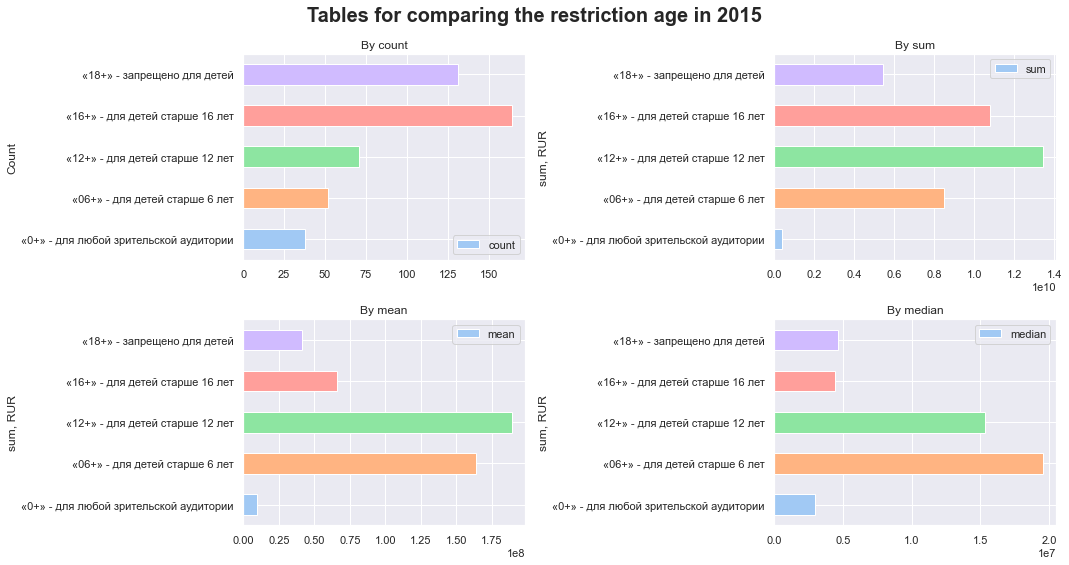

The reviewed year is 2016


age_restriction  count           sum          mean  \
0  «0+» - для любой зрительской аудитории     41  1.502288e+08  3.664118e+06   
1          «06+» - для детей старше 6 лет     70  1.205315e+10  1.721878e+08   
2         «12+» - для детей старше 12 лет     80  1.115076e+10  1.393845e+08   
3         «16+» - для детей старше 16 лет    180  1.659425e+10  9.219027e+07   
4             «18+» - запрещено для детей    151  6.793930e+09  4.499291e+07   

        median  
0  2571294.100  
1  3026256.145  
2  4225478.260  
3  5133021.740  
4  6107001.740

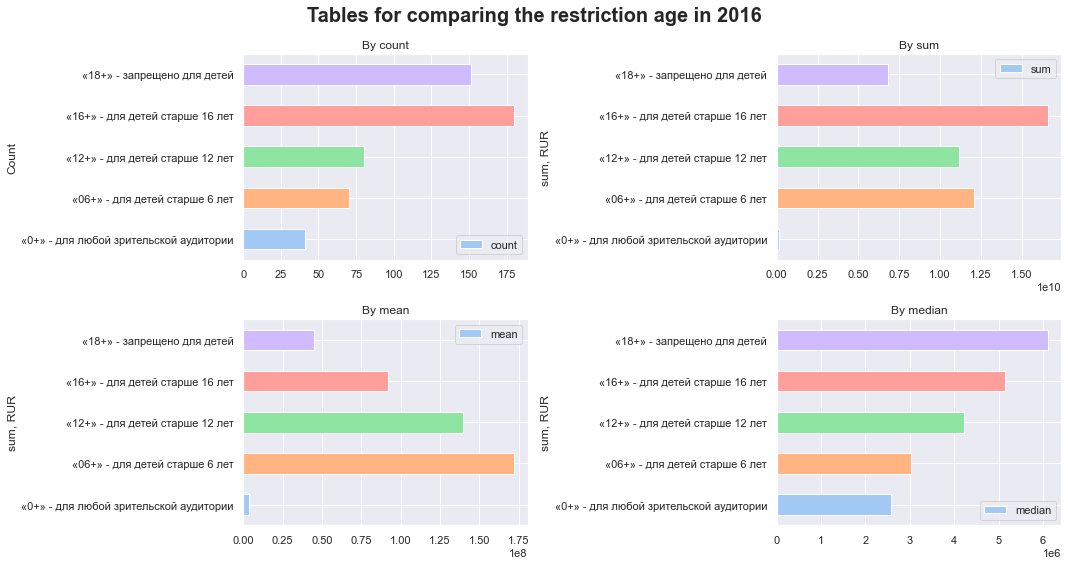

The reviewed year is 2017


age_restriction  count           sum          mean  \
0  «0+» - для любой зрительской аудитории      3  2.295989e+08  7.653298e+07   
1          «06+» - для детей старше 6 лет     44  1.203103e+10  2.734326e+08   
2         «12+» - для детей старше 12 лет     41  7.851428e+09  1.914982e+08   
3         «16+» - для детей старше 16 лет    120  1.869459e+10  1.557883e+08   
4             «18+» - запрещено для детей    147  9.651496e+09  6.565643e+07   

       median  
0  22178956.0  
1  50274982.0  
2   9010548.0  
3   9641407.5  
4   8212677.0

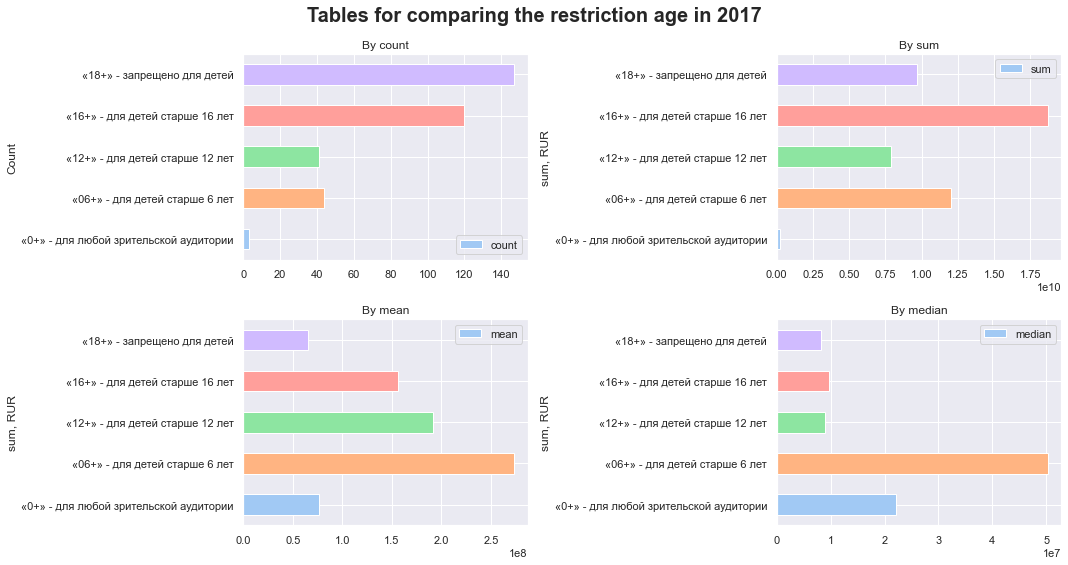

The reviewed year is 2018


age_restriction  count           sum          mean  \
0  «0+» - для любой зрительской аудитории      5  3.244900e+07  6.489800e+06   
1          «06+» - для детей старше 6 лет     65  9.913759e+09  1.525194e+08   
2         «12+» - для детей старше 12 лет     67  1.426729e+10  2.129447e+08   
3         «16+» - для детей старше 16 лет    155  1.627841e+10  1.050220e+08   
4             «18+» - запрещено для детей    179  8.760086e+09  4.893903e+07   

        median  
0   3616937.28  
1  14458669.43  
2   8931965.66  
3   8751895.75  
4   7179466.00

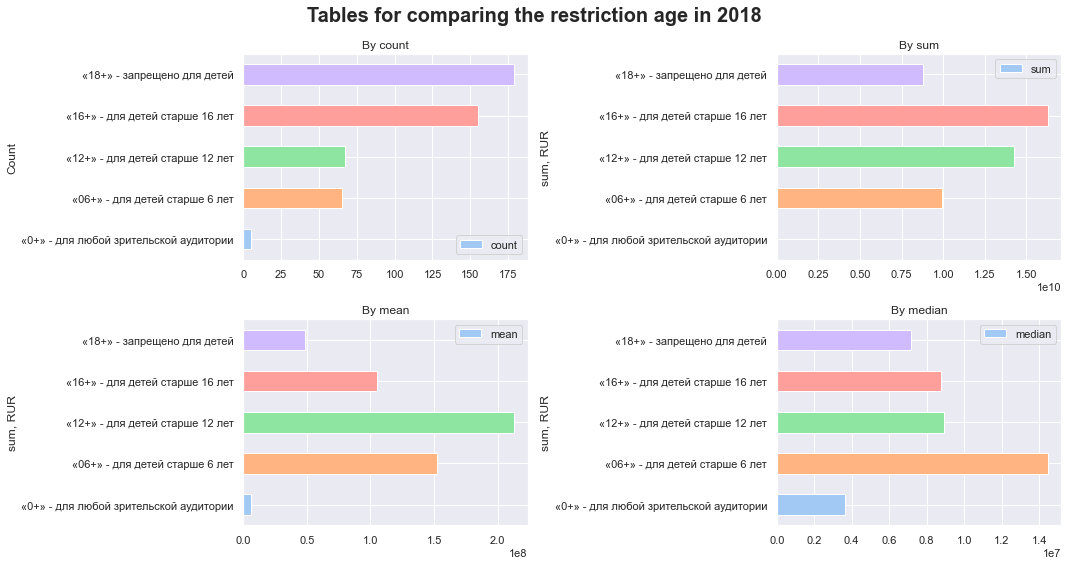

The reviewed year is 2019


age_restriction  count           sum          mean  \
0  «0+» - для любой зрительской аудитории      3  1.774607e+07  5.915356e+06   
1          «06+» - для детей старше 6 лет     80  1.270494e+10  1.588118e+08   
2         «12+» - для детей старше 12 лет     85  1.268020e+10  1.491788e+08   
3         «16+» - для детей старше 16 лет    178  1.275342e+10  7.164842e+07   
4             «18+» - запрещено для детей    183  1.012180e+10  5.531036e+07   

        median  
0   3885434.50  
1  12525531.67  
2   3405545.76  
3   3210717.81  
4   5603216.55

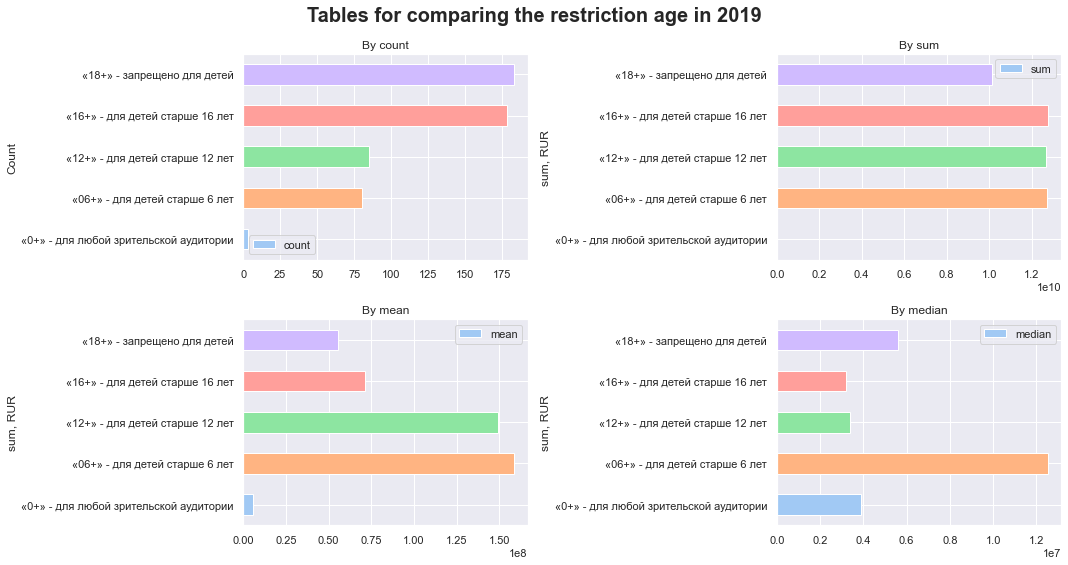

In [54]:
for year in [2015, 2016, 2017, 2018, 2019]: #Создал таблицы и графики для раздельного просмотра по годам
    comp_by_year(df, year)

In [55]:
def comp_by_year2(data):
    pivot_tab = (data.query("2015<=year<=2019").pivot_table(index=['year', 'age_restriction'], values='box_office', 
                                                 aggfunc=['count', 'sum', 'mean', 'median'])
        )
    display(pivot_tab)
comp_by_year2(df)

count           sum  \
                                            box_office    box_office   
year age_restriction                                                   
2015 «0+» - для любой зрительской аудитории         38  3.790546e+08   
     «06+» - для детей старше 6 лет                 52  8.517312e+09   
     «12+» - для детей старше 12 лет                71  1.341951e+10   
     «16+» - для детей старше 16 лет               164  1.078160e+10   
     «18+» - запрещено для детей                   131  5.430351e+09   
2016 «0+» - для любой зрительской аудитории         41  1.502288e+08   
     «06+» - для детей старше 6 лет                 70  1.205315e+10   
     «12+» - для детей старше 12 лет                80  1.115076e+10   
     «16+» - для детей старше 16 лет               180  1.659425e+10   
     «18+» - запрещено для детей                   151  6.793930e+09   
2017 «0+» - для любой зрительской аудитории          3  2.295989e+08   
     «06+» - для детей старше 6 лет                 44  1.203103e+10   
     «12+» - для детей старше 12 лет                41  7.851428e+09   
     «16+» - для детей старше 16 лет               120  1.869459e+10   
     «18+» - запрещено для детей                   147  9.651496e+09   
2018 «0+» - для любой зрительской аудитории          5  3.244900e+07   
     «06+» - для детей старше 6 лет                 65  9.913759e+09   
     «12+» - для детей старше 12 лет                67  1.426729e+10   
     «16+» - для детей старше 16 лет               155  1.627841e+10   
     «18+» - запрещено для детей                   179  8.760086e+09   
2019 «0+» - для любой зрительской аудитории          3  1.774607e+07   
     «06+» - для детей старше 6 лет                 80  1.270494e+10   
     «12+» - для детей старше 12 лет                85  1.268020e+10   
     «16+» - для детей старше 16 лет               178  1.275342e+10   
     «18+» - запрещено для детей                   183  1.012180e+10   

                                                     mean        median  
                                               box_office    box_office  
year age_restriction                                                     
2015 «0+» - для любой зрительской аудитории  9.975120e+06  2.949809e+06  
     «06+» - для детей старше 6 лет          1.637945e+08  1.951325e+07  
     «12+» - для детей старше 12 лет         1.890072e+08  1.535156e+07  
     «16+» - для детей старше 16 лет         6.574147e+07  4.445026e+06  
     «18+» - запрещено для детей             4.145306e+07  4.654761e+06  
2016 «0+» - для любой зрительской аудитории  3.664118e+06  2.571294e+06  
     «06+» - для детей старше 6 лет          1.721878e+08  3.026256e+06  
     «12+» - для детей старше 12 лет         1.393845e+08  4.225478e+06  
     «16+» - для детей старше 16 лет         9.219027e+07  5.133022e+06  
     «18+» - запрещено для детей             4.499291e+07  6.107002e+06  
2017 «0+» - для любой зрительской аудитории  7.653298e+07  2.217896e+07  
     «06+» - для детей старше 6 лет          2.734326e+08  5.027498e+07  
     «12+» - для детей старше 12 лет         1.914982e+08  9.010548e+06  
     «16+» - для детей старше 16 лет         1.557883e+08  9.641408e+06  
     «18+» - запрещено для детей             6.565643e+07  8.212677e+06  
2018 «0+» - для любой зрительской аудитории  6.489800e+06  3.616937e+06  
     «06+» - для детей старше 6 лет          1.525194e+08  1.445867e+07  
     «12+» - для детей старше 12 лет         2.129447e+08  8.931966e+06  
     «16+» - для детей старше 16 лет         1.050220e+08  8.751896e+06  
     «18+» - запрещено для детей             4.893903e+07  7.179466e+06  
2019 «0+» - для любой зрительской аудитории  5.915356e+06  3.885434e+06  
     «06+» - для детей старше 6 лет          1.588118e+08  1.252553e+07  
     «12+» - для детей старше 12 лет         1.491788e+08  3.405546e+06  
     «16+» - для детей старше 16 лет         7.164842e+07  3.210718e+06  
     «18+» - запрещено для детей  

In [56]:
(df.query("(age_restriction == '«0+» - для любой зрительской аудитории') & (year==2017)")
 .sort_values(by='box_office', ascending=False).head())
#Посмотрел, почему в 2017 году рейтинг 0+ такой кассовый

title  pu_number  \
3686                Урфин Джюс и его деревянные солдаты  114000817   
5563                       Колобанга. Привет, Интернет!  114002817   
3479                      Маша и медведь. Новые истории  114001417   
2948  Машкины Страшилки. Серия "Чудовищная правда о ...  214011517   
3222                          МУЛЬТ в кино. Выпуск № 50  114000517   

               show_start_date          type  \
3686 2017-04-06 12:00:00+00:00  Анимационный   
5563 2017-11-30 12:00:00+00:00  Анимационный   
3479 2017-05-25 12:00:00+00:00  Анимационный   
2948 2017-06-09 12:00:00+00:00  Анимационный   
3222 2017-03-21 12:00:00+00:00  Анимационный   

                                    film_studio       production_country  \
3686  ООО "Студия анимационного кино "Мельница"                   Россия   
5563                            ООО "Колобанга"                   Россия   
3479                       ООО "Маша и Медведь"              Россия-Кипр   
2948  ООО Студия "АНИМАККОРД" - АНИМАККОРД ЛТД.  Россия, Республика Кипр   
3222                         ООО "Мульт в кино"                   Россия   

                                          director  \
3686               Д.Шмидт, Ф.Дмитриев, В.Торопчин   
5563                         А.Романец, В.Марченко   
3479  Г.Орлов, А.Беляев, Н.Мальгина, В.Байрамгулов   
2948                                    Д.Червяцов   
3222                                    О.Семёнова   

                             producer                         age_restriction  \
3686           С.Сельянов, А.Боярский  «0+» - для любой зрительской аудитории   
5563                          А.Ревва  «0+» - для любой зрительской аудитории   
3479  Д.Ловейко, О.Кузовков, М.Ратина  «0+» - для любой зрительской аудитории   
2948            Д.Ловейко, О.Кузовков  «0+» - для любой зрительской аудитории   
3222                        П.Смирнов  «0+» - для любой зрительской аудитории   

      refundable_support  ...                          genres   box_office  \
3686                 0.0  ...  мультфильм,приключения,детский  206478186.0   
5563                 NaN  ...              мультфильм,детский   22178956.0   
3479                 NaN  ...                            None     941788.0   
2948                 NaN  ...                            None          NaN   
3222                 NaN  ...              мультфильм,детский          NaN   

     total_govt_support  year first_director  first_producer  first_genres  \
3686         75000000.0  2017        Д.Шмидт      С.Сельянов    мультфильм   
5563                NaN  2017      А.Романец         А.Ревва    мультфильм   
3479                NaN  2017        Г.Орлов       Д.Ловейко          None   
2948                NaN  2017     Д.Червяцов       Д.Ловейко          None   
3222                NaN  2017     О.Семёнова       П.Смирнов    мультфильм   

      refundable_share nonrefundable_share tot_govt_share  
3686               0.0                0.22           0.22  
5563               NaN                 NaN            NaN  
3479               NaN                 NaN            NaN  
2948               NaN                 NaN            NaN  
3222               NaN                 NaN            NaN  

[5 rows x 24 columns]

Выводы:
- Стабильно много снимают картины 16+, но с 2017 по 2019 гг. преобладают ленты 18+
- В абсолютных числах стабильно высокую кассу приносят фильмы 16+, меньше всего 0+. В 2019 году вышло много ААА-проектов с рейтингом 6+ (Малефисента) и 12+ (Холоп), популярный Джокер получил рейтинг R, что сравняло показатели по возрастным ограничениям.
- В 2015 году вышли Звездные войны: Пробуждение силы с рейтингом 12+, что в среднем подняло этот рейтинг по кассовым сборам. Но в остальном наибольшую среднюю и медианную кассу собирают сильмы с рейтингом 6+
- В 2017 году вышли кассовые картины с рейтингом 0+ (Урфин Джюс, Маша и Медведь), что подняло эту категорию в рейтинге по средним и медианным сборам

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

In [57]:
df_budget = df.query("financing_source!='None'") #Сделали срез по категории госучастия
df_no_budget = df.query("financing_source=='None'") #Без госучастия
df_budget.info()
df_no_budget.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 315 entries, 1281 to 7477
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  315 non-null    object             
 1   pu_number              315 non-null    int64              
 2   show_start_date        315 non-null    datetime64[ns, UTC]
 3   type                   315 non-null    category           
 4   film_studio            315 non-null    object             
 5   production_country     315 non-null    object             
 6   director               315 non-null    object             
 7   producer               315 non-null    object             
 8   age_restriction        315 non-null    category           
 9   refundable_support     315 non-null    float64            
 10  nonrefundable_support  315 non-null    float64            
 11  budget                 315 non-null    float64        

In [58]:
len(df_no_budget.query("(tot_govt_share>=0) | (budget>=0)")) #Проверим, остались ли ненулевые значения в соотв столбцах

0

In [59]:
df_budget.describe()

pu_number  refundable_support  nonrefundable_support        budget  \
count  3.150000e+02        3.150000e+02           3.150000e+02  3.150000e+02   
mean   1.115683e+08        1.160317e+07           4.810704e+07  1.340961e+08   
std    5.844829e+06        2.515144e+07           5.988614e+07  1.912260e+08   
min    1.110001e+08        0.000000e+00           0.000000e+00  1.446246e+07   
25%    1.110048e+08        0.000000e+00           2.500000e+07  4.615387e+07   
50%    1.110102e+08        0.000000e+00           3.000000e+07  7.337955e+07   
75%    1.110172e+08        1.000000e+07           4.000000e+07  1.500043e+08   
max    2.140101e+08        1.800000e+08           4.000000e+08  2.305074e+09   

          ratings    box_office  total_govt_support         year  \
count  298.000000  3.010000e+02        3.150000e+02   315.000000   
mean     6.015436  1.306983e+08        5.971022e+07  2016.742857   
std      1.133406  3.391903e+08        7.308521e+07     1.647398   
min      1.000000  1.550000e+03        3.000000e+06  2013.000000   
25%      5.400000  1.067649e+06        2.525000e+07  2015.000000   
50%      6.200000  1.274840e+07        3.500000e+07  2017.000000   
75%      6.700000  1.031348e+08        6.000000e+07  2018.000000   
max      8.500000  3.073569e+09        5.000000e+08  2019.000000   

       refundable_share  nonrefundable_share  tot_govt_share  
count        315.000000           315.000000      315.000000  
mean           0.066921             0.450635        0.517429  
std            0.123241             0.196226        0.170142  
min            0.000000             0.000000        0.040000  
25%            0.000000             0.310000        0.370000  
50%            0.000000             0.460000        0.590000  
75%            0.100000             0.645000        0.660000  
max            0.690000             0.700000        0.780000

In [60]:
df_no_budget.describe()

pu_number  refundable_support  nonrefundable_support  budget  \
count  7.153000e+03                 0.0                    0.0     0.0   
mean   1.362921e+08                 NaN                    NaN     NaN   
std    3.886724e+07                 NaN                    NaN     NaN   
min    1.811096e+06                 NaN                    NaN     NaN   
25%    1.140033e+08                 NaN                    NaN     NaN   
50%    1.210172e+08                 NaN                    NaN     NaN   
75%    1.240045e+08                 NaN                    NaN     NaN   
max    2.310011e+08                 NaN                    NaN     NaN   

           ratings    box_office  total_govt_support         year  \
count  6176.000000  2.816000e+03                 0.0  7153.000000   
mean      6.503578  7.081187e+07                 NaN  2014.495596   
std       1.095038  2.274356e+08                 NaN     3.021273   
min       1.100000  4.000000e+01                 NaN  2010.000000   
25%       5.900000  6.083250e+04                 NaN  2012.000000   
50%       6.600000  2.088913e+06                 NaN  2014.000000   
75%       7.300000  1.931790e+07                 NaN  2017.000000   
max       9.200000  2.576614e+09                 NaN  2019.000000   

       refundable_share  nonrefundable_share  tot_govt_share  
count               0.0                  0.0             0.0  
mean                NaN                  NaN             NaN  
std                 NaN                  NaN             NaN  
min                 NaN                  NaN             NaN  
25%                 NaN                  NaN             NaN  
50%                 NaN                  NaN             NaN  
75%                 NaN                  NaN             NaN  
max                 NaN                  NaN             NaN

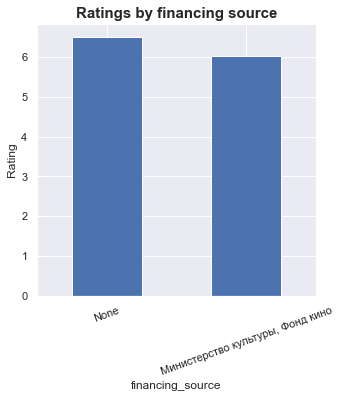

In [61]:
df.groupby('financing_source')['ratings'].mean().plot.bar(figsize=(5, 5))
plt.xticks(rotation=20)
plt.title('Ratings by financing source', fontweight='bold', fontsize=15)
plt.ylabel('Rating')
plt.show() #Оценим качество картин по зрительским рейтингам

In [62]:
def build_pies(column):
    fig, ax = plt.subplots(1, 2, figsize = [15,5])
    fig.suptitle('By {0}'.format(column), fontweight='bold', fontsize=15)
    color = sns.color_palette('pastel')
    df_budget[column].value_counts().plot(ax=ax[0], kind='pie', colors=color)
    ax[0].set_title('With govt share', fontweight='bold')
    ax[0].set_ylabel('')

    df_no_budget[column].value_counts().plot(ax=ax[1], kind='pie', colors=color)
    ax[1].set_title('Without govt share', fontweight='bold')
    ax[1].set_ylabel('')
    
    plt.tight_layout()
    plt.show() 

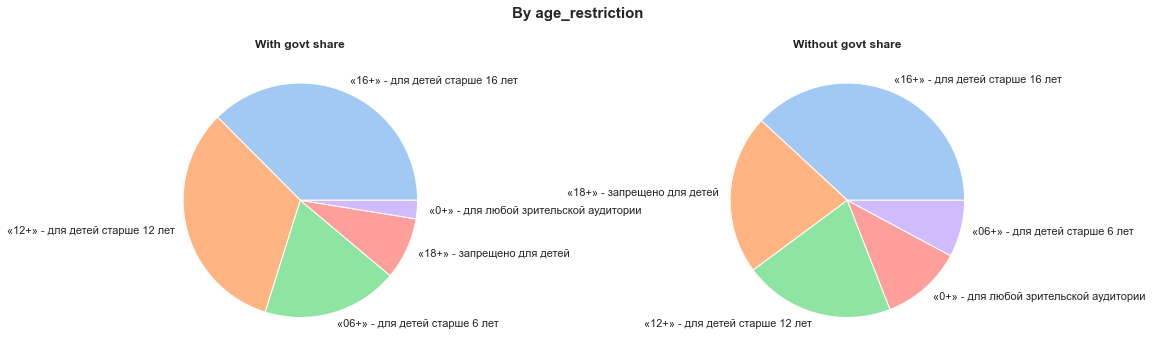

In [63]:
build_pies('age_restriction') #Сравнение фильмов по возрастным категориям

In [64]:
comp_by_year2(df_budget) #Сравниваем по возрастным категориям

count           sum  \
                                            box_office    box_office   
year age_restriction                                                   
2015 «0+» - для любой зрительской аудитории          1  6.104000e+04   
     «06+» - для детей старше 6 лет                 16  1.799574e+09   
     «12+» - для детей старше 12 лет                22  2.004564e+09   
     «16+» - для детей старше 16 лет                36  9.584415e+08   
     «18+» - запрещено для детей                     4  5.310736e+07   
2016 «0+» - для любой зрительской аудитории          1  6.588700e+05   
     «06+» - для детей старше 6 лет                 11  2.005249e+09   
     «12+» - для детей старше 12 лет                22  1.763589e+09   
     «16+» - для детей старше 16 лет                20  1.187127e+09   
     «18+» - запрещено для детей                     3  1.099918e+06   
2017 «0+» - для любой зрительской аудитории          1  2.064782e+08   
     «06+» - для детей старше 6 лет                  8  5.409741e+09   
     «12+» - для детей старше 12 лет                14  4.027990e+09   
     «16+» - для детей старше 16 лет                10  9.951970e+08   
     «18+» - запрещено для детей                     4  1.201098e+08   
2018 «0+» - для любой зрительской аудитории          0  0.000000e+00   
     «06+» - для детей старше 6 лет                  7  1.570291e+09   
     «12+» - для детей старше 12 лет                18  5.883937e+09   
     «16+» - для детей старше 16 лет                18  1.968779e+09   
     «18+» - запрещено для детей                     9  9.465011e+07   
2019 «0+» - для любой зрительской аудитории          0  0.000000e+00   
     «06+» - для детей старше 6 лет                 16  1.899493e+09   
     «12+» - для детей старше 12 лет                15  4.559754e+09   
     «16+» - для детей старше 16 лет                23  1.603183e+09   
     «18+» - запрещено для детей                     5  1.995900e+08   

                                                     mean        median  
                                               box_office    box_office  
year age_restriction                                                     
2015 «0+» - для любой зрительской аудитории  6.104000e+04  6.104000e+04  
     «06+» - для детей старше 6 лет          1.124734e+08  2.849001e+07  
     «12+» - для детей старше 12 лет         9.111652e+07  1.729560e+07  
     «16+» - для детей старше 16 лет         2.662337e+07  1.439777e+06  
     «18+» - запрещено для детей             1.327684e+07  1.026165e+05  
2016 «0+» - для любой зрительской аудитории  6.588700e+05  6.588700e+05  
     «06+» - для детей старше 6 лет          1.822954e+08  3.151778e+07  
     «12+» - для детей старше 12 лет         8.016313e+07  2.170059e+07  
     «16+» - для детей старше 16 лет         5.935637e+07  1.407337e+07  
     «18+» - запрещено для детей             3.666392e+05  6.016100e+04  
2017 «0+» - для любой зрительской аудитории  2.064782e+08  2.064782e+08  
     «06+» - для детей старше 6 лет          6.762176e+08  4.803407e+08  
     «12+» - для детей старше 12 лет         2.877135e+08  1.253418e+08  
     «16+» - для детей старше 16 лет         9.951970e+07  8.964634e+06  
     «18+» - запрещено для детей             3.002745e+07  2.956966e+06  
2018 «0+» - для любой зрительской аудитории           NaN           NaN  
     «06+» - для детей старше 6 лет          2.243273e+08  6.727150e+07  
     «12+» - для детей старше 12 лет         3.268854e+08  9.173125e+07  
     «16+» - для детей старше 16 лет         1.093766e+08  2.322557e+07  
     «18+» - запрещено для детей             1.051668e+07  2.662003e+06  
2019 «0+» - для любой зрительской аудитории           NaN           NaN  
     «06+» - для детей старше 6 лет          1.187183e+08  6.752712e+07  
     «12+» - для детей старше 12 лет         3.039836e+08  1.093343e+07  
     «16+» - для детей старше 16 лет         6.970363e+07  1.861716e+07  
     «18+» - запрещено для детей  

The reviewed year is 2015


age_restriction  count           sum          mean  \
0  «0+» - для любой зрительской аудитории      1  6.104000e+04  6.104000e+04   
1          «06+» - для детей старше 6 лет     16  1.799574e+09  1.124734e+08   
2         «12+» - для детей старше 12 лет     22  2.004564e+09  9.111652e+07   
3         «16+» - для детей старше 16 лет     36  9.584415e+08  2.662337e+07   
4             «18+» - запрещено для детей      4  5.310736e+07  1.327684e+07   

         median  
0  6.104000e+04  
1  2.849001e+07  
2  1.729560e+07  
3  1.439777e+06  
4  1.026165e+05

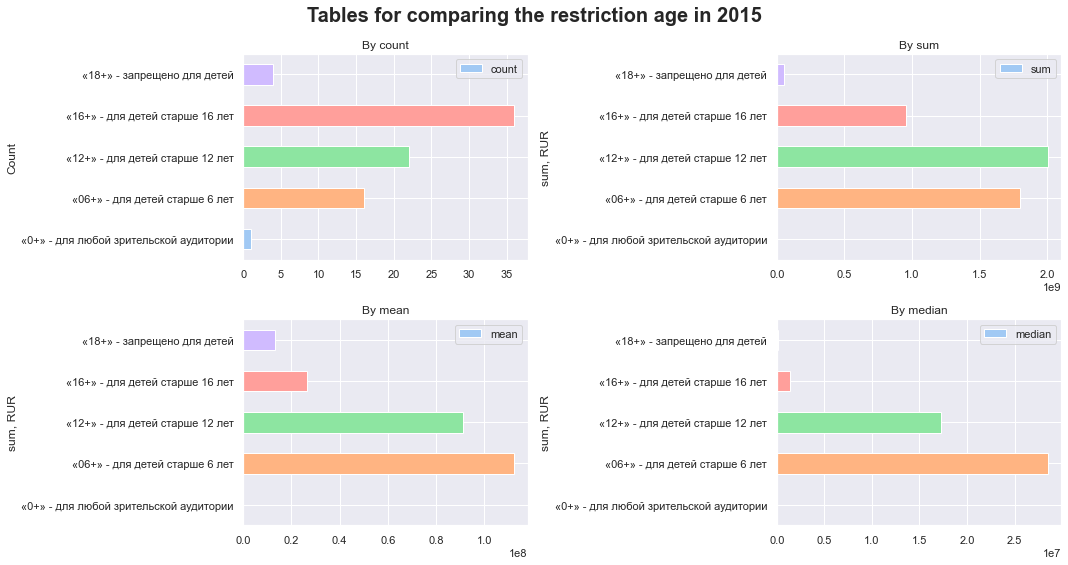

The reviewed year is 2016


age_restriction  count           sum          mean  \
0  «0+» - для любой зрительской аудитории      1  6.588700e+05  6.588700e+05   
1          «06+» - для детей старше 6 лет     11  2.005249e+09  1.822954e+08   
2         «12+» - для детей старше 12 лет     22  1.763589e+09  8.016313e+07   
3         «16+» - для детей старше 16 лет     20  1.187127e+09  5.935637e+07   
4             «18+» - запрещено для детей      3  1.099918e+06  3.666392e+05   

        median  
0    658870.00  
1  31517776.73  
2  21700594.16  
3  14073370.73  
4     60161.00

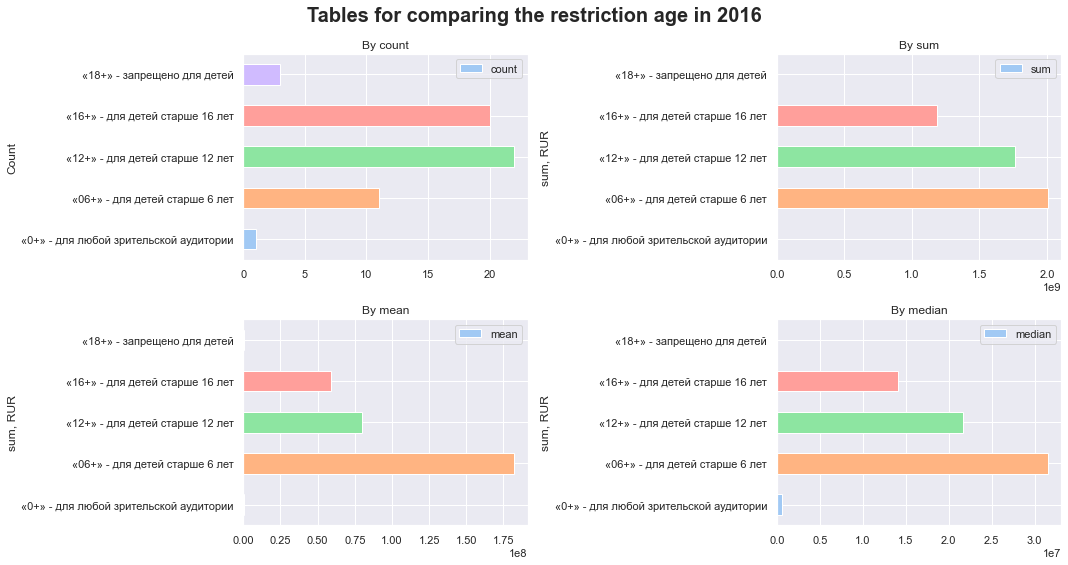

The reviewed year is 2017


age_restriction  count           sum          mean  \
0  «0+» - для любой зрительской аудитории      1  2.064782e+08  2.064782e+08   
1          «06+» - для детей старше 6 лет      8  5.409741e+09  6.762176e+08   
2         «12+» - для детей старше 12 лет     14  4.027990e+09  2.877135e+08   
3         «16+» - для детей старше 16 лет     10  9.951970e+08  9.951970e+07   
4             «18+» - запрещено для детей      4  1.201098e+08  3.002745e+07   

         median  
0  2.064782e+08  
1  4.803407e+08  
2  1.253418e+08  
3  8.964634e+06  
4  2.956966e+06

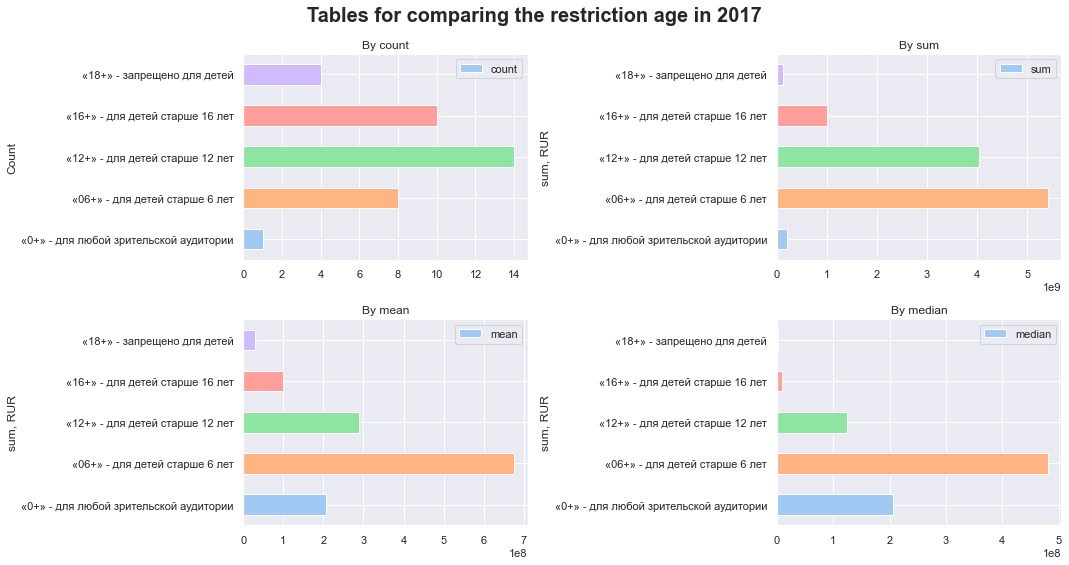

The reviewed year is 2018


age_restriction  count           sum          mean  \
0  «0+» - для любой зрительской аудитории      0  0.000000e+00           NaN   
1          «06+» - для детей старше 6 лет      7  1.570291e+09  2.243273e+08   
2         «12+» - для детей старше 12 лет     18  5.883937e+09  3.268854e+08   
3         «16+» - для детей старше 16 лет     18  1.968779e+09  1.093766e+08   
4             «18+» - запрещено для детей      9  9.465011e+07  1.051668e+07   

         median  
0           NaN  
1  6.727150e+07  
2  9.173125e+07  
3  2.322557e+07  
4  2.662003e+06

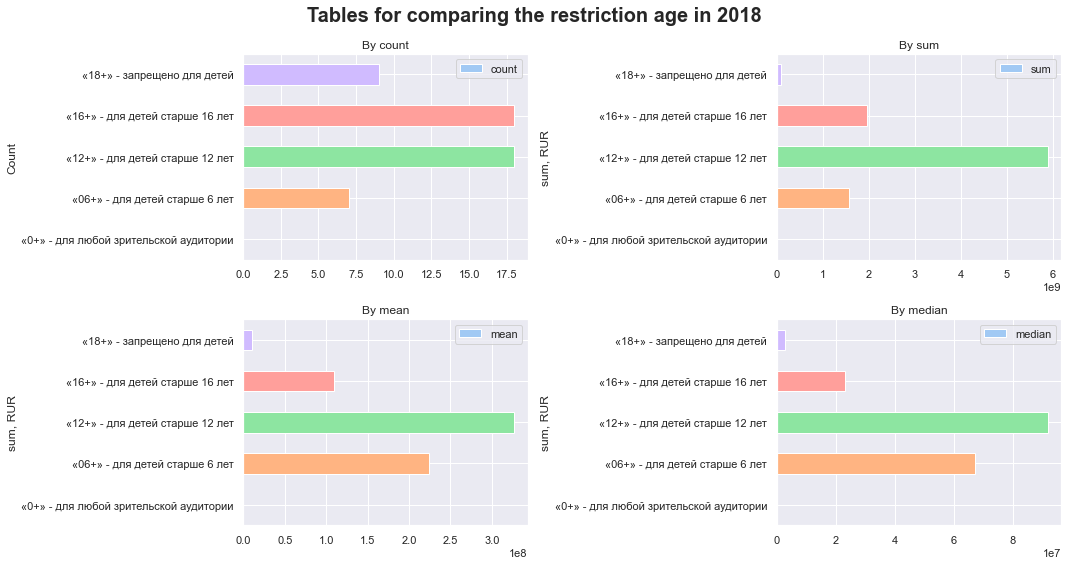

The reviewed year is 2019


age_restriction  count           sum          mean  \
0  «0+» - для любой зрительской аудитории      0  0.000000e+00           NaN   
1          «06+» - для детей старше 6 лет     16  1.899493e+09  1.187183e+08   
2         «12+» - для детей старше 12 лет     15  4.559754e+09  3.039836e+08   
3         «16+» - для детей старше 16 лет     23  1.603183e+09  6.970363e+07   
4             «18+» - запрещено для детей      5  1.995900e+08  3.991801e+07   

        median  
0          NaN  
1  67527122.54  
2  10933431.92  
3  18617156.96  
4   9197107.51

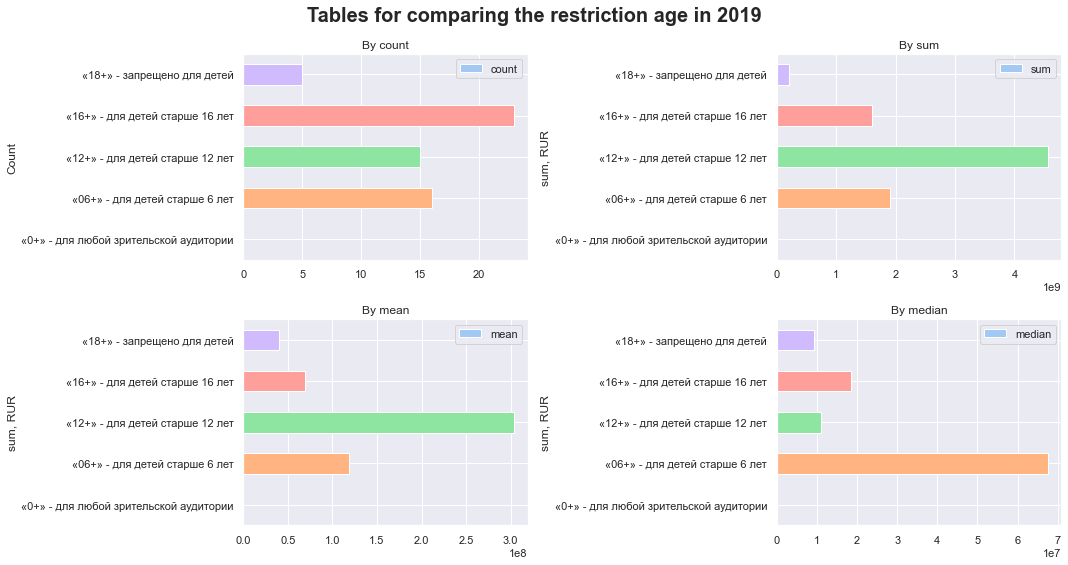

In [65]:
for year in [2015, 2016, 2017, 2018, 2019]: #Создал таблицы и графики для раздельного просмотра по годам
    comp_by_year(df_budget, year)

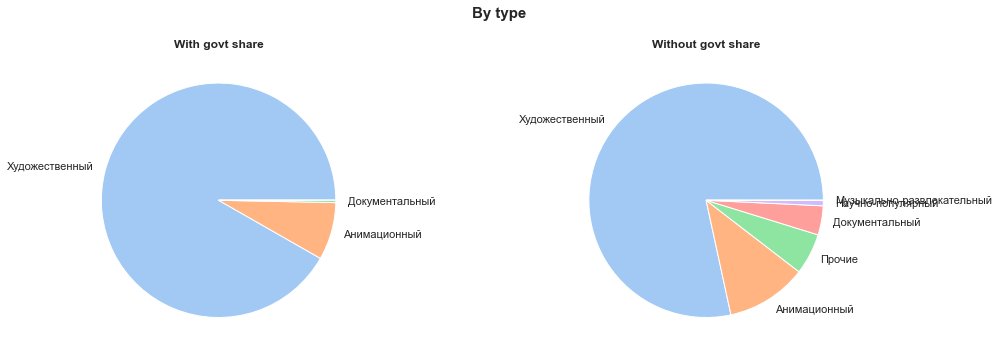

In [66]:
build_pies('type') #Сравнение фильмов по типам

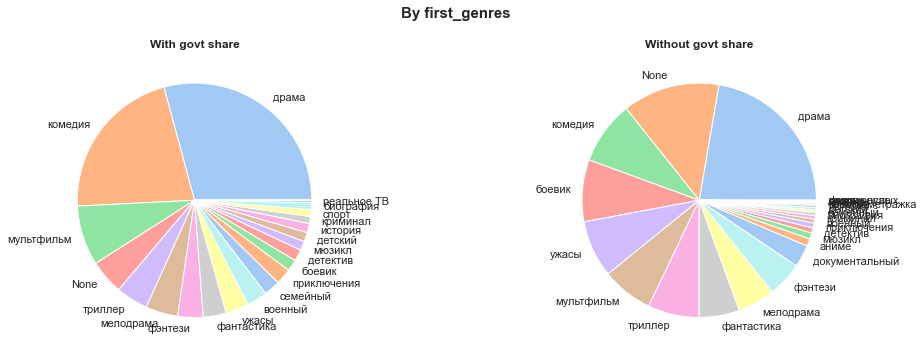

In [67]:
build_pies('first_genres') #Сравнение фильмов по жанрам

mean        median
        box_office    box_office
year                            
2013  1.016119e+07  1.016119e+07
2014  6.714588e+07  4.731240e+06
2015  6.095883e+07  4.568857e+06
2016  8.697762e+07  1.681433e+07
2017  2.907977e+08  4.855786e+07
2018  1.830319e+08  2.322557e+07
2019  1.400342e+08  2.410121e+07

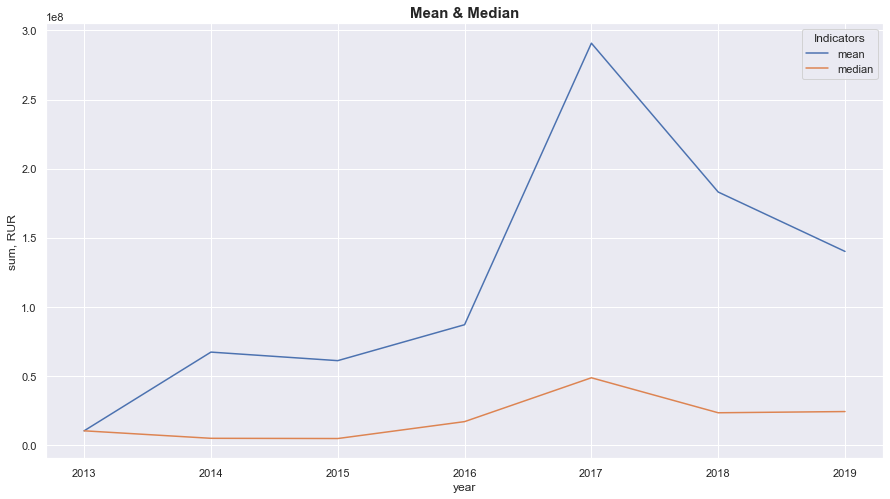

In [68]:
count_mean_and_median(df_budget) #Среднее и медиана по годам в фильмах с госучастием

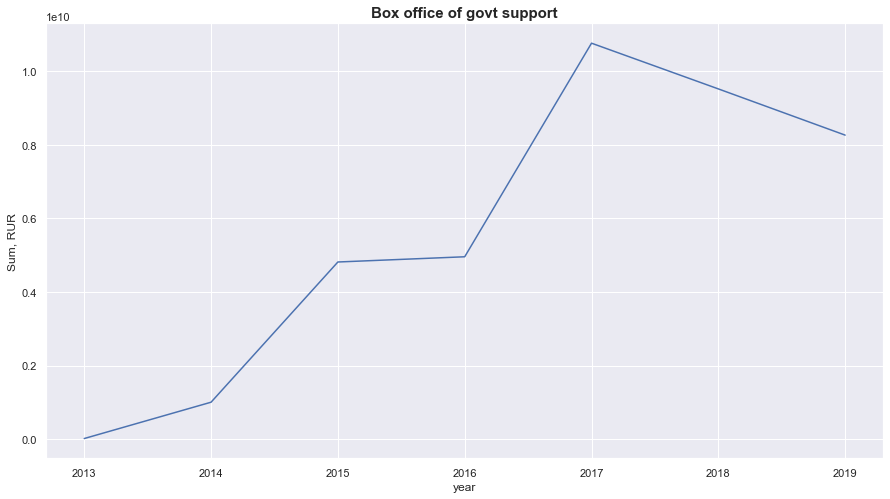

In [69]:
df_budget.groupby('year')['box_office'].sum().plot()
plt.title('Box office of govt support', fontweight='bold', fontsize=15)
plt.ylabel('Sum, RUR')
plt.show()

mean     median
        box_office box_office
year                         
2010  2.404608e+04     1710.0
2011  1.293832e+05     3000.0
2012  5.654815e+04     6220.0
2013  5.354419e+04     3550.0
2014  2.500984e+07    17050.0
2015  8.942196e+07  4920933.0
2016  8.985934e+07  3640802.3
2017  1.185492e+08  9487367.0
2018  9.483135e+07  8292672.0
2019  8.514060e+07  4211950.2

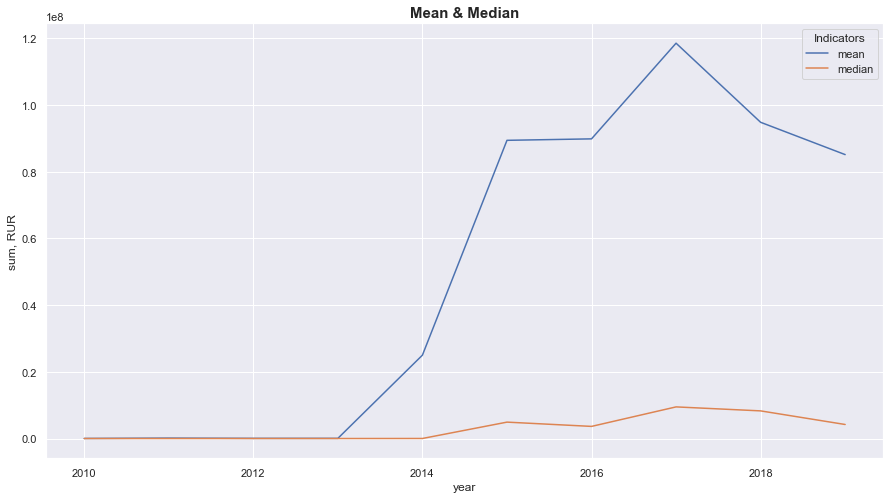

In [70]:
count_mean_and_median(df_no_budget) #Среднее и медиана по годам в фильмах без госучастия

In [71]:
support_grouped = df_budget.groupby('year')['total_govt_support'].agg(['count', 'sum', 'mean', 'median'])
display(support_grouped)
support_grouped.describe() #Исследуем стандартные статистические показатели

count           sum          mean      median
year                                               
2013      2  1.343479e+08  6.717397e+07  67173972.5
2014     15  5.490023e+08  3.660015e+07  28000000.0
2015     80  3.227241e+09  4.034052e+07  30000000.0
2016     58  3.977155e+09  6.857165e+07  35000000.0
2017     39  3.098972e+09  7.946081e+07  40000000.0
2018     52  3.098000e+09  5.957692e+07  37500000.0
2019     69  4.724000e+09  6.846377e+07  40000000.0

count           sum          mean        median
count   7.000000  7.000000e+00  7.000000e+00  7.000000e+00
mean   45.000000  2.686960e+09  6.002683e+07  3.966771e+07
std    28.296054  1.709359e+09  1.586148e+07  1.299296e+07
min     2.000000  1.343479e+08  3.660015e+07  2.800000e+07
25%    27.000000  1.823501e+09  4.995872e+07  3.250000e+07
50%    52.000000  3.098972e+09  6.717397e+07  3.750000e+07
75%    63.500000  3.602198e+09  6.851771e+07  4.000000e+07
max    80.000000  4.724000e+09  7.946081e+07  6.717397e+07

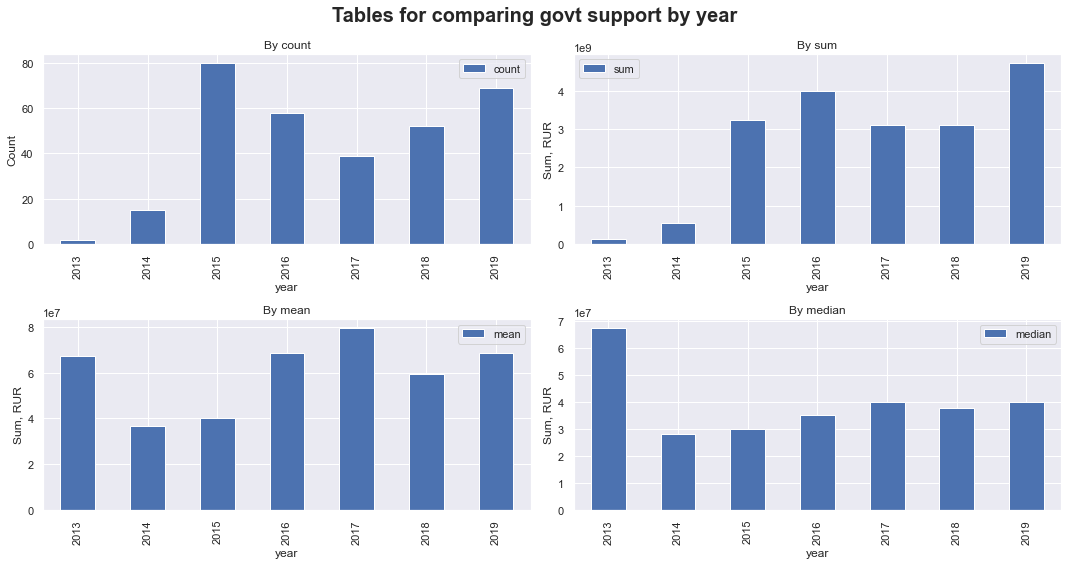

In [72]:
fig, ax = plt.subplots(2, 2)
fig.suptitle('Tables for comparing govt support by year', fontweight='bold', fontsize=20)

support_grouped.plot(ax=ax[0,0], kind='bar', y='count')
ax[0,0].set_title('By count')
ax[0,0].set_ylabel('Count')

support_grouped.plot(ax=ax[0,1], kind='bar', y='sum')
ax[0,1].set_title('By sum')
ax[0,1].set_ylabel('Sum, RUR')

support_grouped.plot(ax=ax[1,0], kind='bar', y='mean')
ax[1,0].set_title('By mean')
ax[1,0].set_ylabel('Sum, RUR')

support_grouped.plot(ax=ax[1,1], kind='bar', y='median')
ax[1,1].set_title('By median')
ax[1,1].set_ylabel('Sum, RUR')

plt.tight_layout()
plt.show() #Построим таблицы

In [73]:
support_refund = (df_budget.pivot_table(index='year', values=['refundable_support', 'nonrefundable_support'],
                                       aggfunc=['sum', 'mean'])
                 )
support_refund

sum                                     mean  \
     nonrefundable_support refundable_support nonrefundable_support   
year                                                                  
2013          1.343479e+08                0.0          6.717397e+07   
2014          4.780023e+08         71000000.0          3.186682e+07   
2015          2.680088e+09        547153119.0          3.350110e+07   
2016          3.074655e+09        902500000.0          5.301130e+07   
2017          2.424625e+09        674346881.0          6.216987e+07   
2018          2.506000e+09        592000000.0          4.819231e+07   
2019          3.856000e+09        868000000.0          5.588406e+07   

                         
     refundable_support  
year                     
2013       0.000000e+00  
2014       4.733333e+06  
2015       6.839414e+06  
2016       1.556034e+07  
2017       1.729095e+07  
2018       1.138462e+07  
2019       1.257971e+07

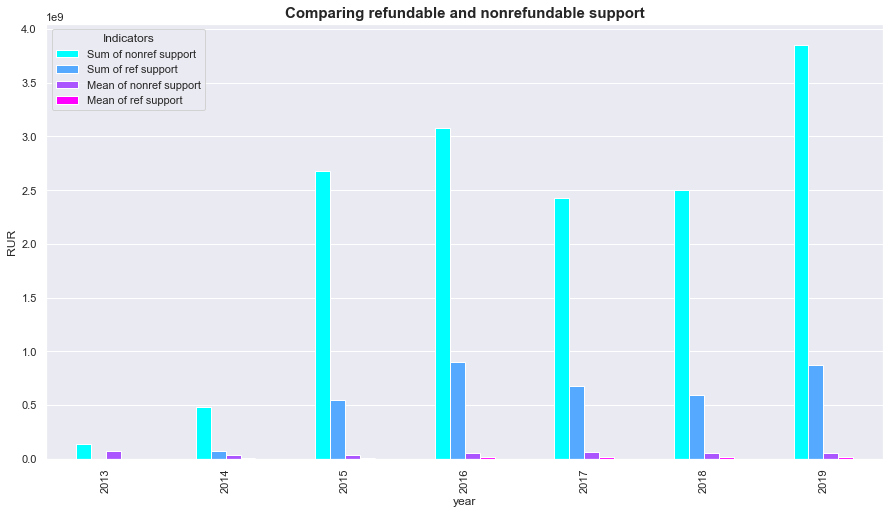

In [74]:
support_refund.plot.bar(cmap='cool') #Сравниваем общую долю возвратных и безвозвратных средств
plt.ylabel('RUR')
plt.grid(axis='x')
plt.title('Comparing refundable and nonrefundable support', fontweight='bold', fontsize=15)
plt.legend(['Sum of nonref support', 'Sum of ref support', 'Mean of nonref support', 
            'Mean of ref support']).set_title('Indicators')
plt.show()

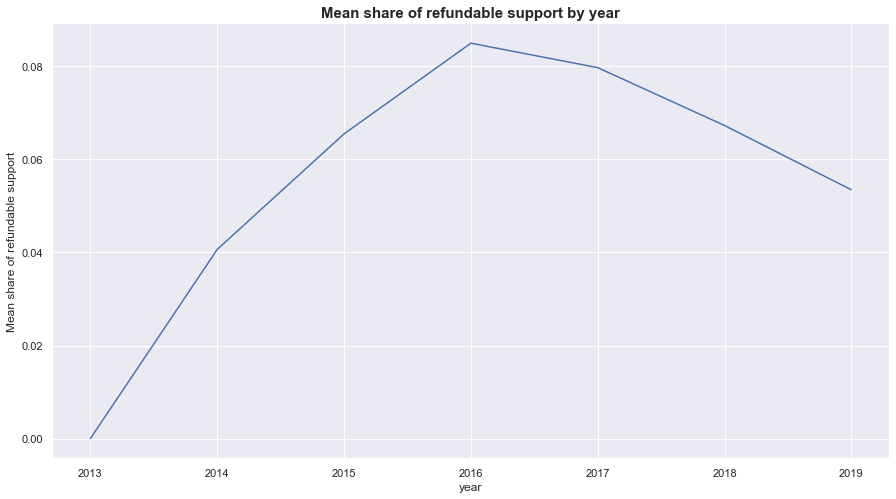

In [75]:
df_budget.groupby('year')['refundable_share'].mean().plot() #Сколько в среднем занимает возвратная поддержка гос-ва
plt.ylabel('Mean share of refundable support')
plt.title('Mean share of refundable support by year', fontweight='bold', fontsize=15)
plt.show()

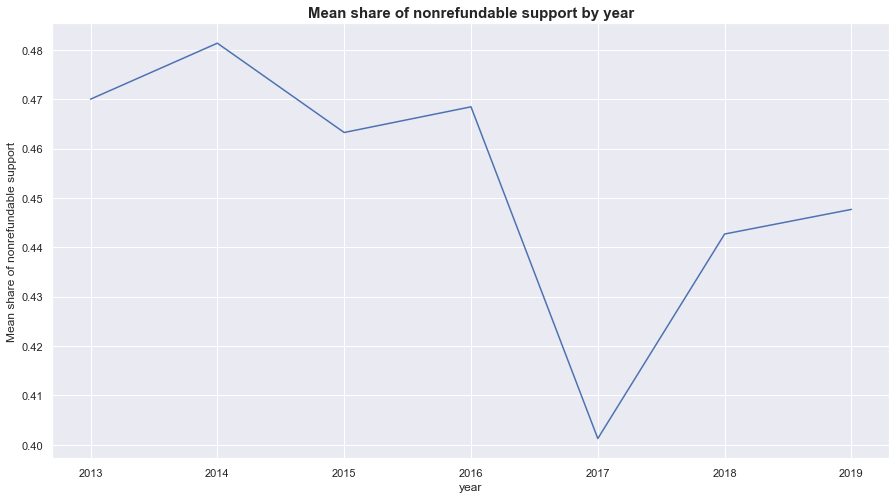

In [76]:
df_budget.groupby('year')['nonrefundable_share'].mean().plot() #Сколько в среднем занимает безвозвратная поддержка гос-ва
plt.ylabel('Mean share of nonrefundable support')
plt.title('Mean share of nonrefundable support by year', fontweight='bold', fontsize=15)
plt.show()

In [77]:
df_budget

title  pu_number           show_start_date  \
1281                Пока еще жива  111005313 2013-10-11 12:00:00+00:00   
1448          Бесславные придурки  111003314 2014-03-28 12:00:00+00:00   
1498                    Невидимки  111004213 2013-09-10 12:00:00+00:00   
1524                        БЕРЦЫ  111004314 2014-05-05 12:00:00+00:00   
1792                     Братья Ч  111004414 2014-04-23 12:00:00+00:00   
...                           ...        ...                       ...   
7463                Союз спасения  111022019 2019-12-26 12:00:00+00:00   
7465  Иван Царевич и Серый Волк 4  114005019 2019-12-20 12:00:00+00:00   
7473                    Вторжение  111022519 2019-12-23 12:00:00+00:00   
7475                   Я свободен  111023019 2019-12-26 12:00:00+00:00   
7477        (Не)идеальный мужчина  111023119 2019-12-24 12:00:00+00:00   

                type                                        film_studio  \
1281  Художественный  АНО содействия развитию кинематографии "Ангел-...   
1448  Художественный                         ООО "Компания "АТК-Студио"   
1498  Художественный                        ООО "Компания "РЕАЛ-ДАКОТА"   
1524  Художественный                             ООО "Студия "Пассажир"   
1792  Художественный                             ООО "Студия "Пассажир"   
...              ...                                                ...   
7463  Художественный                                ЗАО "Дирекция кино"   
7465    Анимационный          ООО "Студия анимационного кино "Мельница"   
7473  Художественный       ООО "Арт Пикчерс Студия", ООО "Водород 2011"   
7475  Художественный                АО "ТПО "Киностудия им. М.Горького"   
7477  Художественный                           ООО "Нон-Стоп Продакшн"    

     production_country                              director  \
1281             Россия                            А.Атанесян   
1448             Россия                             А.Якимчук   
1498             Россия              Р.Давлетьяров, С.Комаров   
1524             Россия  Е.Миндадзе (псевдоним Катя Шагалова)   
1792             Россия                              М.Угаров   
...                 ...                                   ...   
7463             Россия                             А.Кравчук   
7465             Россия                 Д.Шмидт, К.Феоктистов   
7473             Россия                           Ф.Бондарчук   
7475             Россия                             И.Северов   
7477             Россия    М.Бальчюнас (псевдоним М.Вайсберг)   

                                               producer  \
1281                   А.Атанесян, М.Бабаханов, Р.Бутко   
1448                                         А.Тютрюмов   
1498          Р.Давлетьяров, А.Котелевский, А.Олейников   
1524                                         Л.Антонова   
1792                             А.Миндадзе, Л.Антонова   
...                                                 ...   
7463                                А.Максимов, К.Эрнст   
7465                             С.Сельянов, А.Боярский   
7473  Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский   
7475                                           С.Зернов   
7477  С.Мелькумов, А.Роднянский, М.Вайсберг, Р.Минас...   

                      age_restriction  refundable_support  ...  \
1281  «16+» - для детей старше 16 лет                 0.0  ...   
1448  «12+» - для детей старше 12 лет                 0.0  ...   
1498  «12+» - для детей старше 12 лет                 0.0  ...   
1524  «16+» - для детей старше 16 лет                 0.0  ...   
1792  «16+» - для детей старше 16 лет                 0.0  ...   
...                               ...                 ...  ...   
7463  «12+» - для детей старше 12 лет         100000000.0  ...   
7465   «06+» - для детей старше 6 лет         100000000.0  ...   
7473  «12+» - для детей старше 12 лет         100000000.0  ...   
7475  «12+» - для детей старше 12 лет                 0.0  ...   
7477  «12+» - для дете

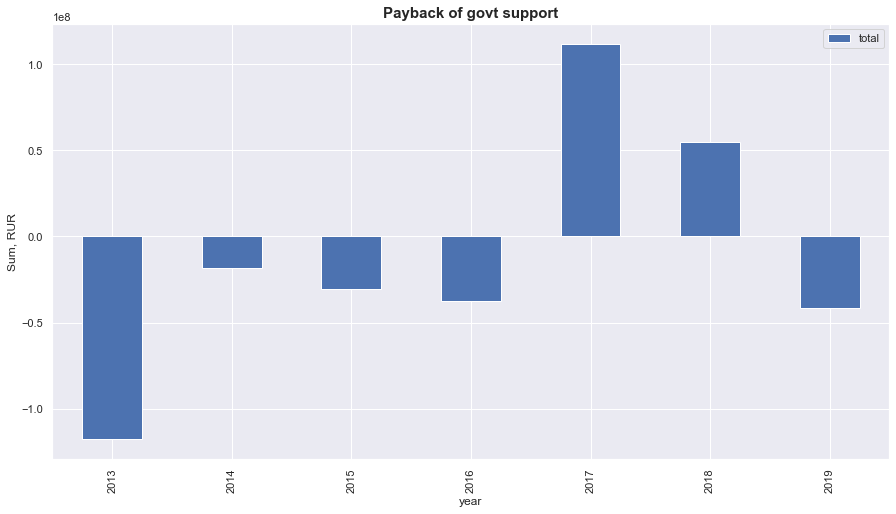

In [79]:
#Изучу окупаемость фильмов с госучастием
net = df_budget.groupby('year')['box_office', 'budget'].mean()
net['total'] = net['box_office'] - net['budget']
net.plot.bar(y='total')
plt.title('Payback of govt support', fontweight='bold', fontsize=15)
plt.ylabel('Sum, RUR')
plt.show()

- В среднем рейтинг фильмов 6,4 - 6,6. Рейтинг кино с госучастием 6 - 6,2. Зрительские оценки у гос кино хуже 
- Что касается возрастного рейтинга, в обоих категориях преобладают фильмы 16+. Но, доля фильмов с российским госучастием 12+ и 6+ гораздо больше, чем без госучастия, а 18+, наоборот, меньше. Видно, что Минкульт стремится финансировать больше семейного и детского кино. Оно гораздо больше собирает в прокате относительно других возрастных категорий, что не типично для средних значений по рынку
- Типология фильмов с госучастием не отличается разнообразием, они игнорируют документальные, музыкальные и проч. направления
- Также можно заметить слабое жанровое разнообразие. Картины с госучастием более чем наполовину состоят из драм, комедий и мультфильмов. У простых лент какого то жанрового доминирования не замечено.
- В 2017-2018 гг. заметно значительное увеличение средних и медианных значений по сборам фильмов, спонсируемых Минкультом по сравнению с остальными. В эти года вышли Т-34, Движение вверх, и прочие высокобюджетные субсидируемые из казны фильмы, которые собрали хорошую кассу
- По настоящему субсидировать киноотрасль Минкульт начал с 2015 года, когда поддерживать начали более 40 фильмов в год с пиковым значением в 2015 году. В среднем в 2017 году выделили больше всего средств в среднем на фильм (2015 год не берем, там было поддержано всего 2 фильма), а в 2019 году выделили больше всего средств на киноотрасль
- В среднем отношение госпомощи к бюджету фильма составляет 8% от доли безвозвратных средств в зависимости от года. Максимум в 2018 году, чуть больше 8%. В 2019 г. учть больше 5%. При этом, как мы видим на графике "Comparing refundable and nonrefundable support". При этом в общей сумме доля возвратных средств в абсолютных величинах едва составляет треть год от года
- Безвозвратно государство спонсирует щедрее - в 2014 году такая поддержка в среднем составляла около 50% от бюджета ленты. Минимум в 2017 году - чуть более 40%, что, впрочем, тоже немало.
- Фильмы с госучастием окупались только в 2017-2018 гг. Связано это с выходом кассово успешных блокбастеров, перечисленных выше. В остальном субсидируемые ленты ежегодно находятся в минусе. В 2019 г. убыток составил более 4 млрд. руб.

### Шаг 5. Напишите общий вывод

Общие выводы:
- Больше всего фильмов получало прокатное удостоверение в 2010 и 2019 гг. Меньше всего - в 2012 и 2017 гг. В среднем каждый год прокатные удостоверения получали 747 фильмов. Количество прокатываемого кино в кинотеатрах росло год от года, с небольшим снижением в 2017 г. Это свидетельствует о развитии отрасли в России, люди охотнее идут в кино, создатели охотно прокатывают свои фильмы в кинозалах.
- Заметны результаты борьбы Минкульта РФ в борьбе с пиратством и выводе отрасли из серой зоны. После 2014 года мы видим рост сборов, который достигает пика в 2018 году с небольшим снижением в 2019 г.
- Основную кассу в кинотеатрах собирают ААА-мейджоры. При этом касса российских кинофильмов растет год от года.
- Большинство фильмов снимается с рейтингом 18+ и 16+. При этом основную кассу собирают фильмы с рейтингом 16+. Фильмы с рейтингом 0+ собирают плохую кассу и их доля в прокате сравнительно невелика. В среднем фильмы 6+ собирают самую большую кассу.
- Рейтинги фильмов, субсидируемых государством ниже, чем без госучастия. При этом Минкульт старается поддерживать картины с семейным рейтингом 6+ и 12+, в этом состоит государственная политика. Субсидируемые ленты не отличаются жанровым разнообразием, преобладают драмы, комедии и мультфильмы. После 2015 года отрасль начали больше спонсировать, абсолютные показатели выросли на порядок, при этом относительные показатели не изменились или изменились слабо. Бокс-офис также вырос. Но фильмы с госучастием не окупаются в прокате (исключения 2017-2018 гг.), и вся эта поддержка не имеет под собой рыночной основы. К тому же Министерство культуры РФ в среднем требует вернуть около половины средств, выделенных в рамках программы субсидий. 

Хотелось бы отдельно порекомендовать Минкульту РФ увеличивать жанровое и возрастное разнообразие субсидируемых фильмов. Возможно, тогда увеличатся и оценки зрителей. Если Минкульт ставит задачей увеличение бокс-офиса или окупаемость спонсируемого кино, то желательно снижать долю безвозвратных средств.